<a href="https://colab.research.google.com/github/LouisKimDev/Car_AI/blob/main/CarAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 2023.09.14

In [ ]:
!python --version

In [ ]:
!pip show absl-py

In [ ]:
!cat /etc/issue.net # 운영체제 확인

In [ ]:
!head /proc/cpuinfo # 사양 확인

In [ ]:
!nvidia-smi

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd

# 10행 5열 짜리 데이터 파일을 만들고 랜덤 값으로 초기화 한다
df = pd.DataFrame(np.random.rand(10, 5))
# dfs.csv 데이터 파일 만들기
df.to_csv('/content/drive/MyDrive/CarAI/dfs.csv')
# 파일이 잘 만들어 졌는지 폴더를 다시 한번 살펴보자.
!ls -Fcal '/content/drive/MyDrive/CarAI'

In [ ]:
pd.read_csv('/content/drive/MyDrive/CarAI/dfs.csv')

### 2023.09.18

In [ ]:
# 라이브러리 임포트
import tensorflow as tf
# constant 함수로 문장을 상수로 변환하여 hello 변수에 저장
hello = tf.constant('Hello, TensorFlow!')

print(hello)

In [ ]:
from tensorflow.python.eager.execute import tensor_pb2
tensor_a = tf.constant(3, name = 'a')
tensor_b = tf.constant(2, name = 'b')
tensor_c = tf.constant(1, name = 'c')
print(tensor_a, tensor_b, tensor_c)
tensor_d = tensor_a + tensor_b
tensor_e = tensor_d + tensor_c
print(tensor_d, tensor_e)


병렬 연산을 위해 가장 유리한 구조는 그래프이다.<br>
내 코드들로 그래프 생성 -> 세션 연결 -> 세션 run으로 실행

In [ ]:
c = [1, 2, 3, 4, 5]
print(c, type(c))

# list를 상수형 tensor으로 변환
c_tensor = tf.constant(c)
# 상수형 텐서와 타입을 출력
print(c_tensor, type(c_tensor))
# 상수형 텐서를 numpy로 변환
print(type(c_tensor.numpy()))


In [ ]:
const_s1 = tf.constant(1) #
const_v1 = tf.constant([1,2]) # 2,
const_v2 = tf.constant([1,2,3]) # 3,
const_m1 = tf.constant([[1,2,3],[4,5,6]]) # 2, 3
const_m2 = tf.constant([[1,2,3],[4,5,6],[7,8,9]]) # 3, 3
const_m3 = tf.constant([[[1],[2]],[[3],[4]],[[5],[6]],[[7],[8]]]) # 4, 2, 1
const_m4 = tf.constant([[[1],[2],[3]],[[4],[5],[6]],[[7],[8],[9]]]) # 3, 3, 1
# shape은 큰 단위 부터 표시 한다.
print(tf.rank(const_s1), const_s1)
print(tf.rank(const_v1), const_v1)
print(tf.rank(const_v2), const_v2)
print(tf.rank(const_m1), const_m1)
print(tf.rank(const_m2), const_m2)
print(tf.rank(const_m3), const_m3)
print(tf.rank(const_m4), const_m4)


In [ ]:
zero_tensor1 = tf.zeros((4,1,4))
print(zero_tensor1)

In [ ]:
mean, std = 0, 1
print(tf.random.uniform((2,3),seed = 0))
print(tf.random.normal((2,3, mean, std)))


In [ ]:
var1 = tf.Variable(3)
print(var1)

In [ ]:
var = tf.Variable(tf.zeros((2,3)))
#텐서를 변수형 텐서로 생성
print(var)
print(tf.zeros([1, 2, 3])) # 배열상수형 텐서 생성

### 23.09.25 변수형 텐서

#### 변수형
- 변하는 값을 담는 도구
- _초기값이 주어져야 하고 사용하기 전에 초기화가 되어야 함_
- **tf.Variable 클래스 사용, 변수 선언과 동시에 초기값을 설정해야 함**

```python
tf.Variable()
```

In [ ]:
import tensorflow as tf
var = tf.Variable(3)
print(var)

In [ ]:
# Variable 클래스에 초기값을 대입해서 정의
var = tf.Variable(tf.zeros((2,3)))

print(var)
print(tf.zeros([1, 2, 3]))

#### 자동 형변환
- 텐서플로우 연산자에 numPy 배열이 들어가면 자동으로 **상수형 텐서 자료형으로 형변환**되어 연산
- tf.Variable 가 수식에 사용될 경우에는 tf.Tensor로 자동 형변환 되어 계산 됨

In [ ]:
import numpy as np

# (2, 3)의 numpy 배열 생성, 1로 초기화
a = np.ones((2,3), dtype = np.float32)
# [3, 1] 리스트를 1로 초기화 하여 상수형 텐서 생성
b = tf.ones([3, 1], dtype = tf.float32)
# numpy 배열을 텐서로 자동 형변환 후 곱 연산 후 텐서로 출력
print(tf.matmul(a,b))

In [ ]:
# 배열 상수형 텐서를 변수형 텐서로 변환
var = tf.Variable(tf.ones((2, 3)))
print(var)
# var은 tf.Tensor로 자동 형변환이 일어나 상수 2와 연산되어 텐서 var1에 저장됨
var1 = var + 2
print(var1)

In [ ]:
W = tf.Variable(tf.random.normal((3, 2)))
b = tf.Variable(tf.random.normal((2, 1)))
print(W)
print(b)
print(tf.matmul(W, b))

#### Tensor 연산자
- 오버로딩이 가능한 연산, 오버로딩이 불가능한 연산, 행렬 연산
- 텐서 연산자들은 math 클래스에 정의되어 있음
- tf.math.(이하 함수) 또는 tf.(이하 함수)로 사용
- **연산할 값의 자료형을 맞춰줘야 함**

In [ ]:
'''
아래는 더할 값들의 자료형이 다르기 때문에 에러 발생
a = tf.add(3, 3.2)
'''
a = tf.add(3, 2)
print(a)

#### **벡터 or 행렬의 차원 축소 텐서 연산자**
- 벡터나 행렬에서는 가로 또는 세로 방향 축으로 'and', 'or', '평균 연산' 등을 하고 차원을 축소시켜 스칼라 값을 구하는 차원축소 연산
- tf.reduce_ 연산자
  - tf.math.reduce_(input_tnesor, axis=None, keepdims = False, name = None)
  - input_tensor: 입력텐서
  - axis: 행렬 연산의 지정된 축에 대해 수행
  - Ex. 2차원 행렬에서 axis = 0 이면 세로축 연산, 1이면 가로축으로 연산 수행
  - keepdims: True일 경우 axis에 설정된 차원의 길이를 1로 축소

In [ ]:
x = tf.constant([[True, True], [False, False]])
print(x)
print(tf.reduce_any(x))
print(tf.reduce_any(x, 0))
print(tf.reduce_any(x, 1))

print(tf.reduce_all(x))
print(tf.reduce_all(x, 0))
print(tf.reduce_all(x, 1))

y = tf.constant([[1., 1.], [2., 2.]])
print(y)
print(tf.reduce_mean(y))
print(tf.reduce_mean(y, 0))

print(tf.reduce_mean(y, 1))

t = tf.constant([[1, 2, 3], [1, 1, 1]])
print(t)
print(tf.reduce_sum(t))
print(tf.reduce_sum(t, 0))
print(tf.reduce_sum(t, 1))

In [ ]:
z = tf.constant([[0., 0., 0.], [ 0., 0., 0.]])
print(tf.reduce_logsumexp(z))
print(tf.reduce_logsumexp(z, 0))
print(tf.reduce_logsumexp(z, 1))
print(tf.reduce_logsumexp(z, 1, keepdims = True))

t = tf.constant([[1, 2, 3], [1, 1, 1]], dtype = tf.float32)
print(tf.math.reduce_euclidean_norm(t, 0))
print(tf.math.reduce_euclidean_norm(t, 1))
print(tf.math.reduce_euclidean_norm(t, 1, keepdims = True))

In [ ]:
a = tf.constant([[2, 0], [0, 1]], dtype = tf.float32)
b = tf.constant([[1, 1], [1, 1]], dtype = tf.float32)
print(tf.matmul(a, b))
print(tf.multiply(a, b))
print(a * b)
print()

In [ ]:
print(tf.linalg.inv(a))
print()
t = [[1, 2, 3], [4, 5, 6]]
print(tf.reshape(t, [3, 2]))
print()

x = tf.constant([[1, 2, 3], [4, 5, 6]])
print(tf.transpose(x))
print()

y = tf.expand_dims(x, 0)
print(y)
y1 = tf.expand_dims(y, 3)
print(y1)
print()

z = tf.squeeze(y1)
print(z)

In [ ]:
X = [[1., 2., 3.]]
W = tf.Variable(tf.random.normal([3, 1], dtype = tf.float32), name = 'W')


### 23.10.08 과제 2

In [ ]:
import tensorflow as tf
x = [[1., 2., 3.],[3.,2.,1.]]
w = tf.Variable([[1],[2],[3]], dtype = tf.float32)
b = tf.Variable([1], dtype = tf.float32)

y= tf.matmul(x, w) + b
print(y)

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt

X = []

for i in range(-20, 20, 1):
  X.append(i*0.1)

W = tf.Variable(tf.random.normal([1], dtype = tf.float32))
b = tf.Variable(tf.random.normal([1], dtype = tf.float32))

@tf.function
def fun1(x1):
  return x1 * W + b
Y1 = fun1(X)

@tf.function
def fun2(x1):
  out = []
  for i in x1:
    out.append((i ** 2) * W * b)
  return out
Y2 = fun2(X)


@tf.function
def fun3(x1):
  out = []
  for i in x1:
    out.append((i ** 3) * W * b)
  return out
Y3 = fun3(X)

print(W)
print(b)

plt.plot(X, Y1, 'ro')
plt.plot(X, Y1)
plt.show()

plt.plot(X, Y2, 'ro')
plt.plot(X, Y2)
plt.show()

plt.plot(X, Y3, 'ro')
plt.plot(X, Y3)
plt.show()


### 23.10.12

#### 손실함수

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# 입력 샘플 데이터
X = [0, 0.5, 1.0, 1.5, 2.0, 2.5]
Y = [0.3, 1.9, 2.4, 4.1,6.8, 7.9]

# X, Y에 대한 평균 구하기
x_mean = sum(X)/len(X)
y_mean = sum(Y)/len(Y)

# 최소 제곱법을 이용하여 a, b 구하기
division = sum((y-y_mean) * (x-x_mean) for y, x in list(zip(Y, X)))
divisor = sum((x-x_mean) ** 2 for x in X)
a = division / divisor
b = y_mean - a * x_mean

# 그래프를 그리기 위해 새로운 x값 입력
new_X = np.arange(0, 3, 0.05)

# 선형회귀직선을 이용하여 예측 Y값 계산
new_Y = a * new_X + b

print('a: ', a, 'b: ', b)

# 그래프 그리기
plt.plot(X, Y, 'ro', label = "Sample Data")
plt.plot(new_X, new_Y, 'b-', label = 'Test Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

#### 경사 하강법

In [ ]:
# Optimization Function

import tensorflow as tf
import matplotlib.pyplot as plt

X = [1, 2, 3]
Y = [1, 2, 3]

W_val = []
cost_val = []

for feed_W in tf.range(-3, 5, 0.1):
  X = tf.cast(X, tf.float32)
  hypothesis = X * feed_W
  cost = tf.reduce_mean(tf.square(hypothesis - Y))
  W_val.append(feed_W)
  cost_val.append(cost)
plt.plot(W_val, cost_val, 'ro')
plt.xlabel('W')
plt.ylabel('cost')
plt.show

In [ ]:
# 경사하강법

import tensorflow as tf
import matplotlib.pyplot as plt

# 입력 데이터 지정
# Y = X에 대해 예측된 y의 값
X = [0, 0.5, 1.0, 1.5, 2.0, 2.5]
Y = [0.3, 1.9, 2.4, 4.1,6.8, 7.9]

# 가중치 설정
# W, b를 -1.0 ~ 1.0 사이에 균등분포를 갖는 Shape 1의 변수형 텐서로 설정
W = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
b = tf.Variable(tf.random.uniform([1], -1.0, 1.0))

# 옵티마이저와 학습률 설정, 텐서플로우의 기본 함수
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate = 0.1)

# 비용함수 정의
@tf.function()
def cost_eval():
  # y = W(가중치) * x + b(bias) -> 일차 함수
  # W 와 X가 행렬이 아니므로 tf.matmul이 아니라 기본 곱셈 기호 사용
  hypothesis = W * X + b

  # mean(h - Y)^2 : 예측값과 실제값의 거리를 비용(손실) 함수로 계산
  cost = tf.reduce_mean(tf.square(hypothesis - Y))
  return cost

print("epoch    W       b       cost")

# 10번 에폭 수행
for epoch in range(10):
  # 비용을 최소화 하는 것이 최종 목표
  optimizer.minimize(cost_eval, var_list = [W, b])

  # 손실, 가중치, 편향을 출력
  # numpy() 함수는 변수의 배열만 출력
  print(epoch, W.numpy(), b.numpy(), cost_eval().numpy())
  # 최적화가 완료된 모델에 테스트 값을 넣고 결과가 잘 나오는지 확인.

print("\n=== Test ===")
x = 5
print('X: ', x, 'Y: ', (W * x + b).numpy())
x = 2.5
print('X: ', x, 'Y: ', (W * x + b).numpy())

# 그래프 그리기 위해 새로운 X값 입력
new_X = tf.range(0, 3, 0.05)
# 선형 회귀 직선을 이용하여 예측 Y값 계
new_Y = W * new_X + b

plt.plot(X, Y, 'ro', label = 'sample data')
plt.plot(new_X, new_Y, 'b-')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

#### SGD

In [ ]:
# SGD

import tensorflow as tf
import matplotlib.pyplot as plt

X = [0, 0.5, 1.0, 1.5, 2.0, 2.5]
Y = [0.3, 1.9, 2.4, 4.1,6.8, 7.9]

W = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
b = tf.Variable(tf.random.uniform([1], -1.0, 1.0))

# optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate = 0.1)
optimizer = tf.optimizers.SGD(learning_rate = 0.1)

@tf.function()
def cost_eval():
  hypothesis = W * X + b
  cost = tf.reduce_mean(tf.square(hypothesis - Y))
  return cost

print("epoch    W       b       cost")

for epoch in range(10):
  optimizer.minimize(cost_eval, var_list = [W, b])

  print(epoch, W.numpy(), b.numpy(), cost_eval().numpy())

print("\n=== Test ===")
x = 5
print('X: ', x, 'Y: ', (W * x + b).numpy())
x = 2.5
print('X: ', x, 'Y: ', (W * x + b).numpy())

nuw_X = tf.range(0, 3, 0.05)

new_Y = W * new_X + b

plt.plot(X, Y, 'ro', label = 'sample data')
plt.plot(new_X, new_Y, 'b-')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### 23.10.16 Adam 옵티마이저, 비선형회귀

In [ ]:
# ADAM

import tensorflow as tf
import matplotlib.pyplot as plt

X = [0, 0.5, 1.0, 1.5, 2.0, 2.5]
Y = [0.3, 1.9, 2.4, 4.1,6.8, 7.9]

W = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
b = tf.Variable(tf.random.uniform([1], -1.0, 1.0))

# optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate = 0.1)
# optimizer = tf.optimizers.SGD(learning_rate = 0.1)j
optimizer = tf.optimizers.Adam(learning_rate = 0.1)

@tf.function()
def cost_eval():
  hypothesis = W * X + b
  cost = tf.reduce_mean(tf.square(hypothesis - Y))
  return cost

print("epoch    W       b       cost")

for epoch in range(10):
  optimizer.minimize(cost_eval, var_list = [W, b])

  print(epoch, W.numpy(), b.numpy(), cost_eval().numpy())

print("\n=== Test ===")
x = 5
print('X: ', x, 'Y: ', (W * x + b).numpy())
x = 2.5
print('X: ', x, 'Y: ', (W * x + b).numpy())

new_X = tf.range(0, 3, 0.05)

new_Y = W * new_X + b

plt.plot(X, Y, 'ro', label = 'sample data')
plt.plot(new_X, new_Y, 'b-')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
# 비선형회귀

import tensorflow as tf
import matplotlib.pyplot as plt

X = tf.constant([0, 0.5, 1.0, 1.5, 2.0, 2.5])
Y = tf.constant([0.3, 1.9, 2.4, 4.1,6.8, 7.9])
a0 = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
a1 = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
a2 = tf.Variable(tf.random.uniform([1], -1.0, 1.0))

optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate = 0.01)

@tf.function()
def cost_eval():
  hypothesis = a0 + a1 * X + (a2 * (X ** 2))
  cost = tf.reduce_mean(tf.square(hypothesis - Y))
  return cost

print("epoch    W       b       cost")

for epoch in range(0, 10, 1):
  optimizer.minimize(cost_eval, var_list = [a0, a1, a2])

  print(epoch, a0.numpy(), a1.numpy(), a2.numpy(), cost_eval().numpy())

print("\n=== Test ===")
x = 5
print('X: ', x, 'Y: ', (a0 + a1 * x + (a2 * (x ** 2))).numpy())
x = 2.5
print('X: ', x, 'Y: ', (a0 + a1 * x + (a2 * (x ** 2))).numpy())

new_X = tf.range(0, 3, 0.05)

new_Y = a0 + a1 * new_X + (a2 * (new_X ** 2))

plt.plot(X, Y, 'ro', label = 'sample data')
plt.plot(new_X, new_Y, 'b-')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf

def step_func(x):
  return (x >= 0) * 1

### 23.10.23 단층 퍼셉트론

#### 단층 퍼셉트론 AND 논리적 학습 과정
1. 가중치 초기화
2. 바이어스 값 초기화
3. for i = 1 to n do{
  - p단계에서

In [ ]:
# And 연산 학습

import numpy as np
import tensorflow as tf

def step_func(x):
  return (x >= 0) * 1

x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[1], [0], [0], [0]])
w = tf.random.normal([2], 0, 1)
b = 1.0
w0 = 0.5
a = 0.1

for i in range(10):
  error_sum = 0
  for j in range(4):
    output = step_func(np.sum(x[j] * w ) + b * w0)
    error = y[j][0] - output
    w = w + x[j] * a * error
    w0 = w0 + a * error
    error_sum += error


  print(i, error, error_sum)

0 -1 -1
1 -1 -1
2 -1 -1
3 -1 -1
4 -1 -1
5 -1 -1
6 0 0
7 0 0
8 0 0
9 0 0


In [ ]:
for i in range(4):
  if step_func(np.sum(x[i] * w) + b * w0) > 0.0:
    output = 1.0
  else:
    output = 0.0

  print('X: ', x[i], 'Y: ', y[i], 'Output: ', step_func(np.sum(x[i] * w) + b * w0), 'result ', output)

In [ ]:
# And 연산 학습, 시그모이드 활성함수

import numpy as np
import tensorflow as tf

def sigmoid(x):
  return 1/(1+np.exp(-x))

x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[1], [0], [0], [0]])
w = tf.random.normal([2], 0, 1)
b = 1.0
w0 = 0.5
a = 0.1

for i in range(1000):
  error_sum = 0
  for j in range(4):
    output = sigmoid(np.sum(x[j] * w ) + b * w0)
    error = y[j][0] - output
    w = w + x[j] * a * error
    w0 = w0 + a * error
    error_sum += error

  if i % 50 == 0:
    print(i, error_sum)

In [ ]:
for i in range(4):
  if sigmoid(np.sum(x[i] * w) + b * w0) > 0.5:
    output = 1.0
  else:
    output = 0.0

  print('X: ', x[i], 'Y: ', y[i], 'Output: ', sigmoid(np.sum(x[i] * w) + b * w0), 'result ', output)

XOR 학습시 제대로 진행 안됨
- 단층 퍼셉트론의 한계


In [ ]:
# xor 연산 학습, 시그모이드 활성함수

import numpy as np
import tensorflow as tf

def sigmoid(x):
  return 1/(1+np.exp(-x))

x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[0], [1], [1], [0]])
w = tf.random.normal([2], 0, 1)
b = 1.0
w0 = 0.5
a = 0.1

for i in range(1000):
  error_sum = 0
  for j in range(4):
    output = sigmoid(np.sum(x[j] * w ) + b * w0)
    error = y[j][0] - output
    w = w + x[j] * a * error
    w0 = w0 + a * error
    error_sum += error

  if i % 50 == 0:
    print(i, error_sum)

In [ ]:
for i in range(4):
  if sigmoid(np.sum(x[i] * w) + b * w0) > 0.5:
    output = 1.0
  else:
    output = 0.0

  print('X: ', x[i], 'Y: ', y[i], 'Output: ', sigmoid(np.sum(x[i] * w) + b * w0), 'result ', output)

In [ ]:
# Or 연산 학습

import numpy as np
import tensorflow as tf

def step_func(x):
  return (x >= 0) * 1

x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[1], [1], [1], [0]])
w = tf.random.normal([2], 0, 1)
b = 1.0
w0 = 0.5
a = 0.1

for i in range(100):
  error_sum = 0
  for j in range(4):
    output = step_func(np.sum(x[j] * w ) + b * w0)
    error = y[j][0] - output
    w = w + x[j] * a * error
    w0 = w0 + a * error
    error_sum += error

  if i % 10 == 0:
    print(i, error_sum)

In [ ]:
for i in range(4):
  if step_func(np.sum(x[i] * w) + b * w0) > 0.0:
    output = 1.0
  else:
    output = 0.0

  print('X: ', x[i], 'Y: ', y[i], 'Output: ', step_func(np.sum(x[i] * w) + b * w0), 'result ', output)

다층 퍼셉트론을 사용한 XOR 연산을 위한 분류기 설계

In [ ]:
import numpy as np
import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tf.keras.layers import Dense

# 입력벡터와 출력 벡터
x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[0], [1], [1], [0]])

# 시퀀셜 함수를 이용하여 딥러닝 네트워크 구조를 한층한층 쌓을 수 있는 모델 생성
model = tf.keras.Sequential()
# 레이어 객체의 Dense()함수를 이용하여 입력 벡터 2, 유닛 개수 2, 활성화 함수는 시그모이드를 갖는 1번째 레이어를 설정한다.
model.add(tf.keras.layers.Dense(units = 2, input_dim = 2, activation = 'sigmoid'))
# 레이어 객체의 Dense()함수를 이용하여 유닛 개수를 1, 활성화 함수는 시그모이드를 갖는 2번째 레이어를 설정한다.
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# 모델을 준비시키는 명령어: 학습률 0.1, 손실은 'mean_squarred_error', 최적화는 SGD를 사용
model.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.1), loss = 'mse')

# 학습된 모델의 구조를 요약하여 보여준다.
model.summary()
# 모델을 학습
# x와 y변수들을 전달하여 학습데이터로 사용하고, 3000번 반복, 배치크기는 1
# 기본값은 32, 미니 배치 경사 하강법을 사용하고 싶지 않을 경우에는 batch_size = None
history = model.fit(x, y, epochs = 3000, batch_size = 1)

# 학습 통해 구해진 가중치와 바이어스 확인
print("======weights======")
for weight in model.weights:
  print(weight)

# 새로운 값을 입력으로 넣어 모델의 출력결과를 예측
print("======test results======")
print(x)
print(model.predict(x))
print("====================")

### 23.10.26 다층 신경망 구축

#### 역전파를 이용하여 가중치를 갱신하는 과정
1. 임의의 초기 가중치 W를 각 레이어에 부여
2. 입력값을 전방향 전파하여 출력값을 계산 및 오차 계산
3. 오차를 각 층의 가중치로 미분한 값을 기존 가중치에서 뺀다(가중치 갱신)
  - 가중치를 갱신하는 방법은 경사 하강법등의 최적화 알고리즘 사용한다.
4. 2 ~  3 단계의 과정을 학습 반복회수(epoch) 또는 허용 오차를 만족 할 때 까지 반복한다
  - 초창기엔 경사하강법 사용
  - 최근에는 SGD나 Adam 많이 사용

**새로 생성할 다층 신경망 구조**
- 입력층 : 2 노드 + 1 바이어스
- 1 레이어 : 10 노드 + 1 바이어스, 10 출력
- 2 레이어 : 5 노드 + 1 바이어스, 5 출력
- 출력층: 3 노드, 3 출력

**입력 벡터 구성**
- 바퀴, 날개 유무에 따라 배, 자동차, 비행기 분류
- 원 핫 인코딩 방식 입력
- 배, 자동차, 비행기 클래스

**모델 구성**
- 활성화 함수
  - 은닉층: ReLU
  - 출력: Sofrmax
- 옵티마이저
  - Adam
  - Loss : 교차 엔트로피

*교차 엔트로피란?*
- 2개의 확률 분포 간의 차이를 계산하는 방법
- 3개 이상의 클래스를 가질 때 씀


In [ ]:
import tensorflow as tf
import numpy as np
from keras.layers import Dense
from keras.models import Sequential, load_model

# 바퀴 유무, 날개 유무
x_data = np.array([[0,0], [1,0], [1,1], [0,0], [0,0], [0,1]])
y_data = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 0],
    [1, 0, 0],
    [0, 0, 1],
])

model = Sequential()
model.add(Dense(input_dim = 2, units = 10, activation = 'relu'))
model.add(Dense(units = 5, activation = 'relu'))

model.add(Dense(units = 3, activation = 'softmax'))

print("==initial weights==")
for weight in model.weights:
  print(weight)

model.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics=['accuracy'])

model.summary()
history = model.fit(x_data, y_data, epochs=100, batch_size = 1)

print("==weights==")
for weight in model.weights:
  print(weight)

print("==test results==")
print(x_data)

print(model.predict(x_data))
print("\n Accuracy: %4.f" % (model.evaluate(x_data, y_data)[1]))

==initial weights==
<tf.Variable 'dense_6/kernel:0' shape=(2, 10) dtype=float32, numpy=
array([[ 0.54991335,  0.09547561, -0.6560642 , -0.3660248 , -0.39496148,
        -0.3600971 , -0.27511624, -0.46452063, -0.02996272, -0.2442489 ],
       [ 0.41496068, -0.04512411,  0.64860016, -0.33561382,  0.6426793 ,
        -0.40368775,  0.35532993, -0.17621613, -0.67253745,  0.10083008]],
      dtype=float32)>
<tf.Variable 'dense_6/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>
<tf.Variable 'dense_7/kernel:0' shape=(10, 5) dtype=float32, numpy=
array([[ 0.3893941 ,  0.4535908 ,  0.15948784, -0.09508234,  0.6244672 ],
       [ 0.2279647 , -0.44373748, -0.16469944, -0.32024992, -0.03952622],
       [ 0.54734105,  0.2014041 , -0.3740299 ,  0.58346397, -0.28389132],
       [ 0.32114196, -0.04556668, -0.57806736,  0.5177172 , -0.47301728],
       [ 0.59100574,  0.46795183,  0.5932639 , -0.03639418, -0.3285427 ],
       [-0.00185561,  0.608465

### 23.11.02 가중치, 모델 저장

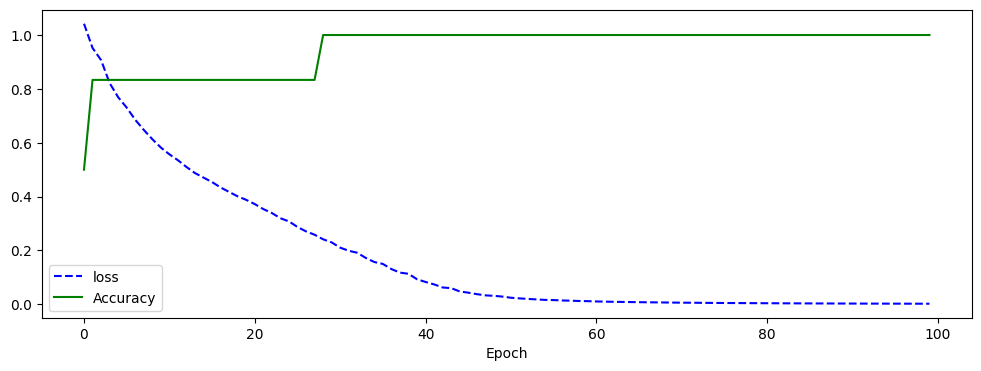

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 4))
plt.subplot(1, 1, 1)
plt.plot(history.history['loss'], 'b--', label='loss')
plt.plot(history.history['accuracy'], 'g-', label='Accuracy')

plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
import io
import pandas as pd
from google.colab import files

uploaded = files.upload()
filename = ''
for fn in uploaded.keys():
  print('User uploaded file "{name}" with {length} byes'.format(name = fn, length=len(uploaded[fn])))
  filename = fn

da = pd.read_csv(io.StringIO(uploaded[filename].decode('utf-8')))
print(da)

Saving data.csv to data.csv
User uploaded file "data.csv" with 95 byes
   tire  wing  ship  car  plane
0     0     0     1    0      0
1     1     0     0    1      0
2     1     1     0    0      1
3     0     0     1    0      0
4     0     0     1    0      0
5     0     1     0    0      1


In [ ]:
# 구글드라이브에서 불러오던지 아니면 C드라이브에서 학습파일 가져오던지 둘중하나 방법이 코테에 나옴

In [ ]:
# 학습 데이터를 불러와보기
import tensorflow as tf
import numpy as np
import os
from keras.models import Sequential
from keras.layers import Dense

data = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/231102 CarAI/data.csv', delimiter = ',', skiprows = 1, unpack = True, dtype=np.float32)
x_data = np.transpose(data[0:2])
y_data = np.transpose(data[2:])


model = Sequential()
model.add(Dense(input_dim = 2, units = 10, activation = 'relu'))
model.add(Dense(units = 5, activation = 'relu'))

model.add(Dense(units = 3, activation = 'softmax'))

print("==initial weights==")
for weight in model.weights:
  print(weight)

model.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(x_data, y_data, epochs=100, batch_size = 1)

print("==weights==")
for weight in model.weights:
  print(weight)

print("==test results==")
print(x_data)

print(model.predict(x_data))
print("\n Accuracy: %4.f" % (model.evaluate(x_data, y_data)[1]))


==initial weights==
<tf.Variable 'dense_30/kernel:0' shape=(2, 10) dtype=float32, numpy=
array([[-0.48737097, -0.13036782, -0.01287603,  0.64778286, -0.47976905,
        -0.16231191, -0.20059067,  0.6391782 ,  0.69483477, -0.46313453],
       [-0.26985312,  0.5871276 ,  0.31587702, -0.22069302, -0.53857195,
         0.2198081 ,  0.3830666 ,  0.5751602 , -0.1323561 , -0.39695638]],
      dtype=float32)>
<tf.Variable 'dense_30/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>
<tf.Variable 'dense_31/kernel:0' shape=(10, 5) dtype=float32, numpy=
array([[-0.59703547, -0.03261507, -0.28640062,  0.54724294,  0.34037137],
       [-0.31014612,  0.24353898,  0.08750552, -0.5879257 ,  0.2827227 ],
       [-0.22254187,  0.08745635,  0.28485233,  0.57030135, -0.08565003],
       [ 0.10736519,  0.04433185, -0.58691466, -0.0136413 , -0.21673226],
       [ 0.41238612, -0.37249565, -0.5912937 , -0.3429506 , -0.38558745],
       [ 0.16928315, -0.360

In [ ]:
# 가중치를 저장해보기
import tensorflow as tf
import numpy as np
import os
from keras.models import Sequential
from keras.layers import Dense

data = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/231102 CarAI/data.csv', delimiter = ',', skiprows = 1, unpack = True, dtype=np.float32)
x_data = np.transpose(data[0:2])
y_data = np.transpose(data[2:])


model = Sequential()
model.add(Dense(input_dim = 2, units = 10, activation = 'relu'))
model.add(Dense(units = 5, activation = 'relu'))
model.add(Dense(units = 3, activation = 'softmax'))

print("==initial weights==")
for weight in model.weights:
  print(weight)

model.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(x_data, y_data, epochs=100, batch_size = 1)

checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/231102 CarAI/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only = True, verbose = 1)
history = model.fit(x_data, y_data, epochs = 100, batch_size = 1, callbacks = [cp_callback])

print("==weights==")
for weight in model.weights:
  print(weight)

print("==test results==")
print(x_data)

print(model.predict(x_data))
print("\n Accuracy: %4.f" % (model.evaluate(x_data, y_data)[1]))



==initial weights==
<tf.Variable 'dense_21/kernel:0' shape=(2, 10) dtype=float32, numpy=
array([[-0.26488197, -0.08313328,  0.15144426,  0.14642626,  0.5953148 ,
        -0.45830852, -0.05245429, -0.29227576, -0.20924291,  0.01949054],
       [-0.5817182 ,  0.5702612 ,  0.11333287,  0.07057202,  0.30175418,
        -0.6298361 ,  0.6159815 ,  0.16139561,  0.64919144,  0.31065398]],
      dtype=float32)>
<tf.Variable 'dense_21/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>
<tf.Variable 'dense_22/kernel:0' shape=(10, 5) dtype=float32, numpy=
array([[ 0.36702895,  0.58658725,  0.16859055, -0.13878828,  0.06795901],
       [-0.47604287, -0.3526925 ,  0.03728521, -0.14666882,  0.24439347],
       [-0.5803321 , -0.33605126,  0.3426739 ,  0.42438525,  0.5354174 ],
       [ 0.03081739,  0.6090074 , -0.5099377 , -0.6075602 ,  0.47933334],
       [ 0.45331937,  0.2235496 , -0.26263535, -0.59365207, -0.45572656],
       [-0.5556818 , -0.120

In [ ]:
# 가중치를 로드 해보기, 모델 구조는 저장하지 않아서 만들어줘야함

import tensorflow as tf
import numpy as np
import os
from keras.models import Sequential
from keras.layers import Dense

data = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/231102 CarAI/data.csv', delimiter = ',', skiprows = 1, unpack = True, dtype=np.float32)
x_data = np.transpose(data[0:2])
y_data = np.transpose(data[2:])

model = Sequential()
model.add(Dense(input_dim = 2, units = 10, activation = 'relu'))
model.add(Dense(units = 5, activation = 'relu'))
model.add(Dense(units = 3, activation = 'softmax'))

print("==initial weights==")
for weight in model.weights:
  print(weight)

model.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics=['accuracy'])

# model.summary()
# history = model.fit(x_data, y_data, epochs=100, batch_size = 1)

checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/231102 CarAI/cp.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only = True, verbose = 1)
# history = model.fit(x_data, y_data, epochs = 100, batch_size = 1, callbacks = [cp_callback])

model.load_weights(checkpoint_path)

print("==weights==")
for weight in model.weights:
  print(weight)

print("==test results==")
print(x_data)

print(model.predict(x_data))
print("\n Accuracy: %4.f" % (model.evaluate(x_data, y_data)[1]))



==initial weights==
<tf.Variable 'dense_27/kernel:0' shape=(2, 10) dtype=float32, numpy=
array([[ 0.6399829 , -0.0162918 , -0.09222722,  0.2267912 , -0.53103155,
         0.3543343 , -0.19950664, -0.02505261,  0.5558134 ,  0.49508256],
       [-0.43672395, -0.4937419 ,  0.3456834 , -0.2205602 ,  0.09974456,
         0.30612963, -0.5411247 , -0.4404037 ,  0.35821444, -0.6411869 ]],
      dtype=float32)>
<tf.Variable 'dense_27/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>
<tf.Variable 'dense_28/kernel:0' shape=(10, 5) dtype=float32, numpy=
array([[ 0.43985552, -0.3228082 , -0.3764451 ,  0.02171695, -0.39197278],
       [-0.5582262 ,  0.22800136, -0.5664427 ,  0.4140399 ,  0.46434397],
       [ 0.21071696, -0.17624643,  0.51751834, -0.5970715 , -0.20906854],
       [ 0.37776214, -0.16141495, -0.5834479 , -0.29505274,  0.06832528],
       [ 0.4136768 ,  0.46879882,  0.3485719 ,  0.05368531,  0.31220698],
       [-0.56551147, -0.398

1/1 [==============================] - 0s 319ms/step
[[9.99743760e-01 8.95962803e-05 1.66589874e-04]
 [2.37682863e-04 9.99631643e-01 1.30640896e-04]
 [5.60053550e-08 6.45524269e-05 9.99935389e-01]
 [9.99743760e-01 8.95962803e-05 1.66589874e-04]
 [9.99743760e-01 8.95962803e-05 1.66589874e-04]
 [1.09308974e-04 2.09543919e-06 9.99888539e-01]]


1/1 [==============================] - 1s 749ms/step - loss: 2.1888e-04 - accuracy: 1.0000

 Accuracy:    1


In [ ]:
# 모델 전체를 저장해보기
import tensorflow as tf
import numpy as np
from keras.layers import Dense
from keras.models import Sequential, load_model

# 바퀴 유무, 날개 유무
x_data = np.array([[0,0], [1,0], [1,1], [0,0], [0,0], [0,1]])
y_data = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 0],
    [1, 0, 0],
    [0, 0, 1],
])

model = Sequential()
model.add(Dense(input_dim = 2, units = 10, activation = 'relu'))
model.add(Dense(units = 5, activation = 'relu'))

model.add(Dense(units = 3, activation = 'softmax'))

print("==initial weights==")
for weight in model.weights:
  print(weight)

model.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics=['accuracy'])

model.summary()
history = model.fit(x_data, y_data, epochs=100, batch_size = 1)

model.save('/content/drive/MyDrive/Colab Notebooks/231102 CarAI/my_model.h5')

==initial weights==
<tf.Variable 'dense_36/kernel:0' shape=(2, 10) dtype=float32, numpy=
array([[-0.30724108,  0.33123356, -0.39372134, -0.6768106 , -0.1811443 ,
        -0.6134232 ,  0.19765842, -0.38512456, -0.4002317 , -0.29766497],
       [ 0.40092176,  0.2585783 ,  0.08906102,  0.4110536 , -0.5402312 ,
         0.17748225, -0.27100188,  0.6057542 ,  0.24107373,  0.0893358 ]],
      dtype=float32)>
<tf.Variable 'dense_36/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>
<tf.Variable 'dense_37/kernel:0' shape=(10, 5) dtype=float32, numpy=
array([[ 0.04633945, -0.47890407, -0.49838242,  0.46215755,  0.4249776 ],
       [-0.59766847,  0.5836901 , -0.5659251 ,  0.37458092, -0.3820718 ],
       [ 0.4172011 ,  0.36547083,  0.5675836 , -0.02324337, -0.2173211 ],
       [-0.10475957,  0.32083827,  0.22786033,  0.3173163 ,  0.6042771 ],
       [-0.37799537, -0.1547068 , -0.05303377, -0.33798197,  0.04185408],
       [-0.61790967,  0.226

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# 모델 전체를 저장해보기
from tensorflow import keras
import tensorflow as tf
import numpy as np
from keras.layers import Dense
from keras.models import Sequential, load_model

# 바퀴 유무, 날개 유무
x_data = np.array([[0,0], [1,0], [1,1], [0,0], [0,0], [0,1]])
y_data = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 0],
    [1, 0, 0],
    [0, 0, 1],
])

new_model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/231102 CarAI/my_model.h5')
new_model.summary

loss, acc = new_model.evaluate(x_data, y_data, verbose = 2)
print('복원된 모델의 정확도: {:5.2f}%'.format(100*acc))

1/1 - 0s - loss: 0.0161 - accuracy: 1.0000 - 197ms/epoch - 197ms/step
복원된 모델의 정확도: 100.00%


### 23.11.06 모델 경량화 및 배포, 심층 신경망

In [ ]:
# 훈련 결과를 tflite로 저장하기
import tensorflow as tf
import numpy as np
from keras.layers import Dense
from keras.models import Sequential, load_model

# 바퀴 유무, 날개 유무
x_data = np.array([[0,0], [1,0], [1,1], [0,0], [0,0], [0,1]])
y_data = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 0],
    [1, 0, 0],
    [0, 0, 1],
])

model = Sequential()
model.add(Dense(input_dim = 2, units = 10, activation = 'relu'))
model.add(Dense(units = 5, activation = 'relu'))

model.add(Dense(units = 3, activation = 'softmax'))

print("==initial weights==")
for weight in model.weights:
  print(weight)

model.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics=['accuracy'])

model.summary()
history = model.fit(x_data, y_data, epochs=100, batch_size = 1)

# tflite확장자로 경량화된 모델 저장하기
# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model
with open("/content/drive/MyDrive/Colab Notebooks/231102 CarAI/model.tflite", 'wb') as f:
  f.write(tflite_model)


# model.save('/content/drive/MyDrive/Colab Notebooks/231102 CarAI/my_model.h5')

==initial weights==
<tf.Variable 'dense_3/kernel:0' shape=(2, 10) dtype=float32, numpy=
array([[ 0.06585526,  0.21152157, -0.35679904,  0.30763692, -0.05595553,
         0.15415633,  0.21585423,  0.3143317 ,  0.6059454 ,  0.00083584],
       [ 0.11488777, -0.01494813,  0.05628967,  0.69060344, -0.10876131,
         0.1339956 ,  0.5927095 ,  0.15925694, -0.43794537, -0.49318066]],
      dtype=float32)>
<tf.Variable 'dense_3/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>
<tf.Variable 'dense_4/kernel:0' shape=(10, 5) dtype=float32, numpy=
array([[-0.33662003,  0.09592378, -0.47031015,  0.61256975, -0.20927331],
       [ 0.00451237, -0.03966612,  0.4050117 , -0.39721933,  0.42244142],
       [-0.6055243 , -0.09103203, -0.16505003, -0.2647485 ,  0.32733536],
       [ 0.1911729 , -0.1613878 ,  0.23526561,  0.03714991,  0.02512509],
       [-0.39800042,  0.35964507,  0.58206517, -0.6021149 ,  0.10874867],
       [-0.02160192,  0.514140

In [ ]:
# 기존 파일을 tflite로 변환해서 저장하기
import keras
model = keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/231102 CarAI/my_model.h5", compile=False)
saved_model_path = "/content/drive/MyDrive/Colab Notebooks/231102 CarAI/my_model.pb"
# keras format (h5) - > tensorflow format(tf), pb로 저장
model.save(saved_model_path, save_format="tf")
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS,tf.lite.OpsSet.SELECT_TF_OPS]
#pb->tflite
tflite_model = converter.convert()
# Save the model.
with open("/content/drive/MyDrive/Colab Notebooks/231102 CarAI/model2.tflite", 'wb') as f:
  f.write(tflite_model)

**코테3**
- 모델 레이어를 늘리는거 연습하기

#### 심층 신경망





**심층신경망**
문제점
- 오류 역전파 자체의 문제점
  - 뒤쪽은 가중치가 변하는데 계속 미분하다보니 앞쪽까지 오류가 전파 안됨
- 학습에 불충분한 데이터 수
  - 레이블된 데이터 셋이 필요한데 부족함
- 컴퓨팅 파워의 한계
  - 80년대의 컴퓨터는 CPU로 연산했기 때문에 컴퓨팅 파워가 부족함
- 효율적인 학습 알고리즘의 부재
  - 테스트와 훈련에도 동일한 성능을 보장해주는 일반화 알고리즘이 부족함
- 지역최소에 갇힘
  - 가중치 값을 조정시키면서 전역 극소값을 찾아야하는데 지역 극소점에서 학습을 멈춰버림

학습시간이 지날수록 모델은 학습 데이터에 과적합되어 학습 데이터의 오차는 줄어들지만, 테스트 데이터에 대해서는 오차가 증가함

학습 시킬 때 검증 데이터셋을 도입함으로써 오버피팅을 예방함

11490434/11490434 [==============================] - 2s 0us/step


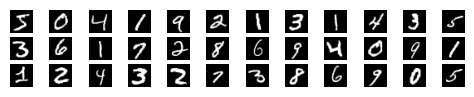

In [ ]:
import tensorflow as tf
import matplotlib.pylab as plt

(train_images, train_labels),(test_images, test_labels) = tf.keras.datasets.mnist.load_data()

plt.figure(figsize = (6, 1))
for i in range(36) :
  plt.subplot(3, 12, i + 1)
  plt.imshow(train_images[i], cmap = "gray")
  plt.axis("off")
plt.show()

In [ ]:
train_images = train_images.reshape((60000, 784))
test_images = test_images.reshape((10000, 784))
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
print(train_labels[:10]) # 이걸 원핫인코딩 형태로 바꿔줘야함

[5 0 4 1 9 2 1 3 1 4]


In [ ]:
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels, 10)
one_hot_test_labes = to_categorical(test_labels, 10)

# 앞의 10개 영상에 대한 one hot 인코딩 결과 확인
print(one_hot_train_labels[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
# 파라미터 = 128 * 784 + 128

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(input_dim=784, units = 128, activation = 'relu'))
model.add(tf.keras.layers.Dense(units=10, activation = 'softmax'))

model.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.01),
              loss='categorical_crossentropy', metrics = ['accuracy'])
model.summary()

history = model.fit(train_images, one_hot_train_labels, epochs = 5, batch_size = 64, workers = 16)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
938/938 [==============================] - 6s 5ms/step - loss: 0.2177 - accuracy: 0.9341
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1303 - accuracy: 0.9618
Epoch 3/5
938/938 [==============================] - 4s 5ms/step - loss: 0.1118 - accuracy: 0.9680
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0982 - accuracy: 0.9728
Epoch 5/5
938/

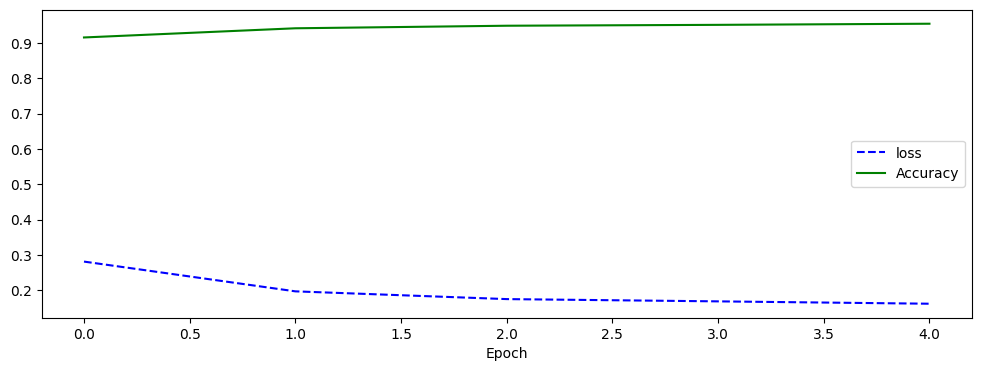

최적화 완료!


In [ ]:
plt.figure(figsize = (12,4))
plt.subplot(1, 1, 1)

plt.plot(history.history['loss'], 'b--', label = 'loss')

plt.plot(history.history['accuracy'], 'g-', label='Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
print('최적화 완료!')

In [ ]:
import numpy as np

labels = model.predict(test_images)

# .evaluate() 함수의 반환값: 평가된 [0]loss, [1]accuracy
print("\n Accuracy: %.4f " % (model.evaluate(test_images, one_hot_test_labes)[1]))

# 테스트 영상 중 10개만 출력하고 예측 결과를 그림 위에 표시해 보자
fig = plt.figure()
for i in range(10):
  subplot = fig.add_subplot(2, 5, i+1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%d' % np.argmax(labels[i]))
  subplot.imshow(test_images[i].reshape((28,28)), cmap = plt.cm.gray_r)
plt.show()

### 23.11.13 정규화 알고리즘

#### 정규화 알고리즘

- Dropout
  - 과적합을 해결하기 위한 방법
  - 원리
    - **학습 단계 마다 일부 뉴런을 배제 함**으로써 뉴런들이 균형적으로 학습되게함
    - 학습까지 시간은 좀 더 오래 걸림<br>

20퍼센트 드롭아웃 시키는 코드
```python
model.add(tf.keras.layers.Dropout(0.2))
```

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(input_dim=784, units = 128, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=10, activation = 'softmax'))

model.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.01),
              loss='categorical_crossentropy', metrics = ['accuracy'])
model.summary()

history = model.fit(train_images, one_hot_train_labels, epochs = 5, batch_size = 64, workers = 16)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
938/938 [==============================] - 9s 5ms/step - loss: 0.2815 - accuracy: 0.9156
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1973 - accuracy: 0.9416
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1753 


>최근에는 드롭아웃보다 배치 정규화를 많이쓰는 추세

- 배치 정규화(Batch Normalization)
  - **이전 층의 출력값(현재 층에서는 가중치가 결합된 입력값, wx)들을 정규 분포로 정규화하는 작업**
  - `초기값에 비교적 자유로워 진다.

특징
1. 각 레이어에서 정규화 하면서 입력 분포가 일정해지므로 학습률에 크게 영향 X
2. 학습률 선택에 자유롭기 때문에 학습률을 높게 설정할 수 있고, 학습 속도 빨라짐
3. 학습마다 입력값을 정규화 해서 가중치 초기값 영향 줄어든다.
4. 과적합 위험을 줄인다.
5. 기울기 소실 문제 해결한다.

코드
```python
model.add(tf.keras.layers.BatchNormalization())
```


In [ ]:

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(input_dim=784, units = 128, activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(units=10, activation = 'softmax'))


model.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.01),
              loss='categorical_crossentropy', metrics = ['accuracy'])
model.summary()

history = model.fit(train_images, one_hot_train_labels, epochs = 5, batch_size = 64, workers = 16)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 102282 (399.54 KB)
Trainable params: 102026 (398.54 KB)
Non-trainable params: 256 (1.00 KB)
_________________________________________________________________
Epoch 1/5
938/938 [==============================] - 8s 7ms/step - loss: 0.2097 - accuracy: 0.9368
Epoch 2/5
938/938 [==============================] - 6s 6ms/step - loss: 0.1185 - accuracy: 0.9643
Epoch 3/5
938/

### 23.11.16 CNN

#### CNN


Weight Sharing
- 같은 필터로 한 이미지를 찍어서 특징을 추출하기 때문에 가중치를 공유한다.

CNN의 구조
- 컨볼루션
- 채널
  - 컬러영상에 컨볼루션을 적용할 때 각 색상별 채널마다 다른 가중치를 가진 컨볼루션 필터 적용
  - 즉, 3채널 RGB영상이면 3개의 채널별 특징맵 생성
  - 최종 특징맵은 3개 채널 특징맵 합쳐서 1개가 됨
- 스트라이드
  - ㅁㄴㅇㄹ
- 패딩
- 풀링 레이어
   - 컨볼루션의 출력데이터의 크기를 줄이거나 *특정 데이터를 강조*하는 용도
   - output 크기는 축소되지만, channel 개수는 변화 X, 파라미터 증가 X
  

#### CNN 구현
  - 3개 컨볼루션 레이어
  - 2개 맥스풀링 레이어
  - 2개 FC 레이어

인풋 - 컨볼루션1 - 맥스풀링 - 컨볼루션 2 - 맥스풀링 - 컨볼루션 3 - FC 1 - FC2 - Output

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels, 10)
one_hot_test_labes = to_categorical(test_labels, 10)

# 앞의 10개 영상에 대한 one hot 인코딩 결과 확인
print(one_hot_train_labels[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


**모델 구성 시작**

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', strides = (1, 1), input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu')) # 파라미터 수: 3 x 3 x 64 x 32
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'))# 파라미터 수: 3 x 3 x 64 x 64

In [ ]:
# model.summary()

Flatten, FC later (Dense Layer)
- Dense 레이어는 입력을 벡터로 받음
- 3D 텐서를 Dense 레이어에 입력하기 위해서 펼치는 일자로 작업이 필요
- Flatten(): 벡터로 펼쳐주는 함수
- Dense 레이어: Fully Connected 레이어
  - 64개 노드로 구성된 신경망

FC Layer (Dense Layer)
- 10개의 노드로 구성된 신경망이므로 출력도 10개임
- 즉, MNIST 0 - 9 까지 클래스별 확률값 출력


In [ ]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

배치 사이즈 10

Epoch 1/5
6000/6000 [==============================] - 38s 4ms/step - loss: 0.2731 - accuracy: 0.9223
Epoch 2/5
6000/6000 [==============================] - 27s 5ms/step - loss: 0.2016 - accuracy: 0.9483
Epoch 3/5
6000/6000 [==============================] - 31s 5ms/step - loss: 0.1960 - accuracy: 0.9520
Epoch 4/5
6000/6000 [==============================] - 28s 5ms/step - loss: 0.2027 - accuracy: 0.9533
Epoch 5/5
6000/6000 [==============================] - 32s 5ms/step - loss: 0.1934 - accuracy: 0.9548


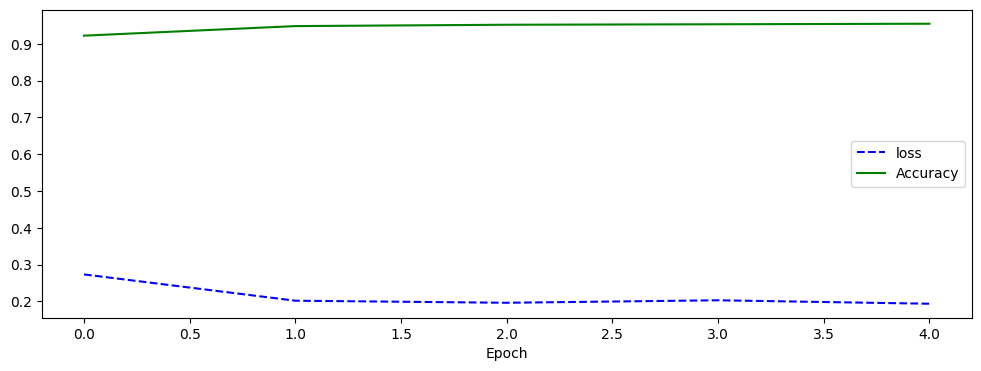

최적화 완료!


In [ ]:
model.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_images, one_hot_train_labels, epochs = 5, batch_size = 10)

plt.figure(figsize = (12,4))
plt.subplot(1, 1, 1)

plt.plot(history.history['loss'], 'b--', label = 'loss')

plt.plot(history.history['accuracy'], 'g-', label='Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
print('최적화 완료!')



배치사이즈 32

Epoch 1/5
1875/1875 [==============================] - 14s 6ms/step - loss: 0.1385 - accuracy: 0.9674
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1139 - accuracy: 0.9719
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1095 - accuracy: 0.9726
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1078 - accuracy: 0.9744
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1005 - accuracy: 0.9746


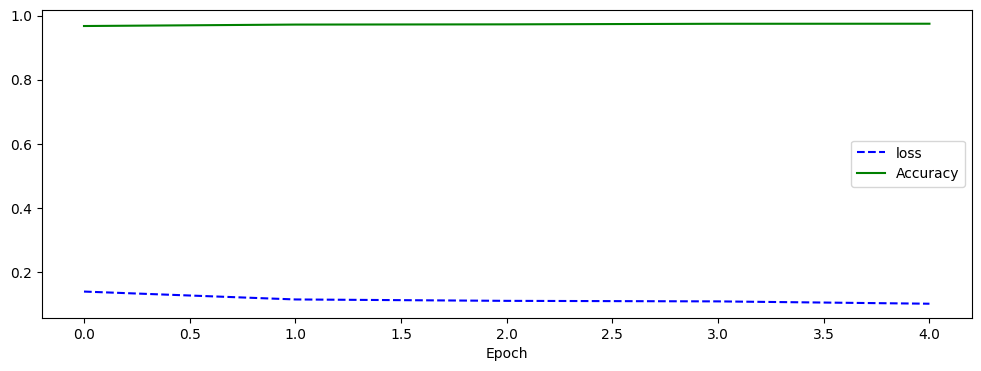

최적화 완료!


In [ ]:
model.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_images, one_hot_train_labels, epochs = 5, batch_size = 32)

plt.figure(figsize = (12,4))
plt.subplot(1, 1, 1)

plt.plot(history.history['loss'], 'b--', label = 'loss')

plt.plot(history.history['accuracy'], 'g-', label='Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
print('최적화 완료!')



배치 사이즈 128

Epoch 1/5
469/469 [==============================] - 11s 9ms/step - loss: 0.0735 - accuracy: 0.9815
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0600 - accuracy: 0.9841
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0578 - accuracy: 0.9836
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0525 - accuracy: 0.9861
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0544 - accuracy: 0.9853


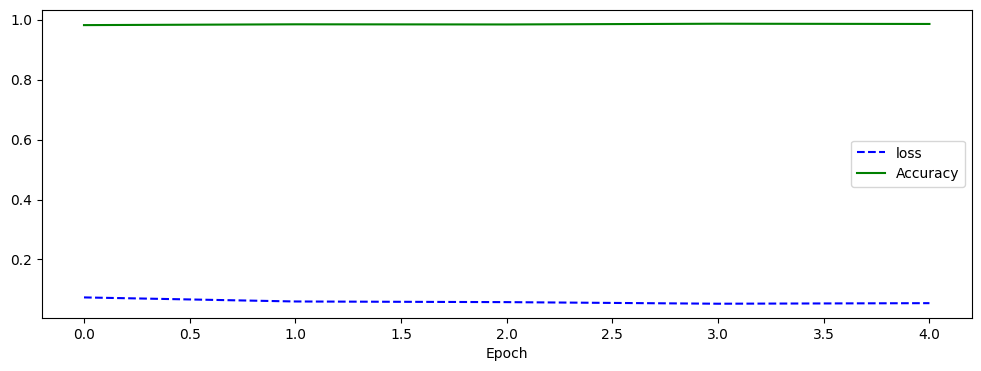

최적화 완료!


In [ ]:
model.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_images, one_hot_train_labels, epochs = 5, batch_size = 128)

plt.figure(figsize = (12,4))
plt.subplot(1, 1, 1)

plt.plot(history.history['loss'], 'b--', label = 'loss')

plt.plot(history.history['accuracy'], 'g-', label='Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
print('최적화 완료!')



검증 데이터를 추가하여 다시 실행하기
- 배치사이즈 64, 20% 검증 데이터, 80% 학습 데이터
- validation_split = 0.2 옵션 추가

Epoch 1/5
750/750 [==============================] - 11s 9ms/step - loss: 0.1097 - accuracy: 0.9751 - val_loss: 0.0812 - val_accuracy: 0.9791
Epoch 2/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0773 - accuracy: 0.9800 - val_loss: 0.0713 - val_accuracy: 0.9819
Epoch 3/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0794 - accuracy: 0.9799 - val_loss: 0.0829 - val_accuracy: 0.9772
Epoch 4/5
750/750 [==============================] - 5s 7ms/step - loss: 0.0794 - accuracy: 0.9799 - val_loss: 0.0836 - val_accuracy: 0.9792
Epoch 5/5
750/750 [==============================] - 4s 6ms/step - loss: 0.0763 - accuracy: 0.9802 - val_loss: 0.0769 - val_accuracy: 0.9828


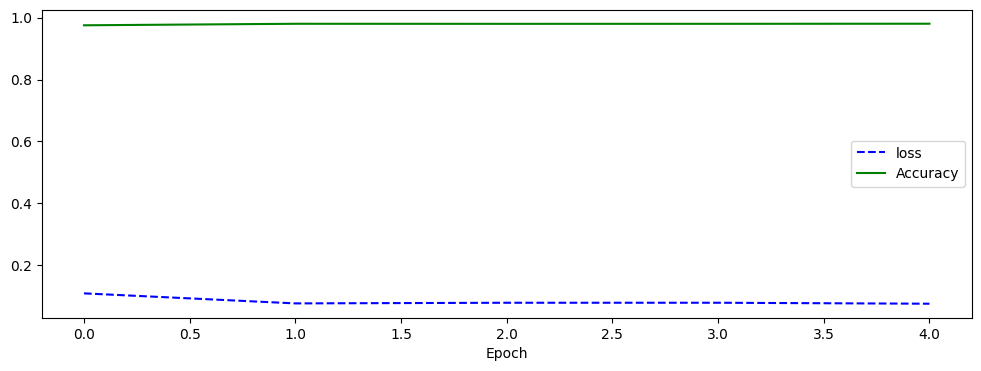

최적화 완료!


In [ ]:
model.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_images, one_hot_train_labels, epochs = 5, batch_size = 64, validation_split=0.2)

plt.figure(figsize = (12,4))
plt.subplot(1, 1, 1)

plt.plot(history.history['loss'], 'b--', label = 'loss')

plt.plot(history.history['accuracy'], 'g-', label='Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
print('최적화 완료!')


### 23.11.20

#### 코테 안내

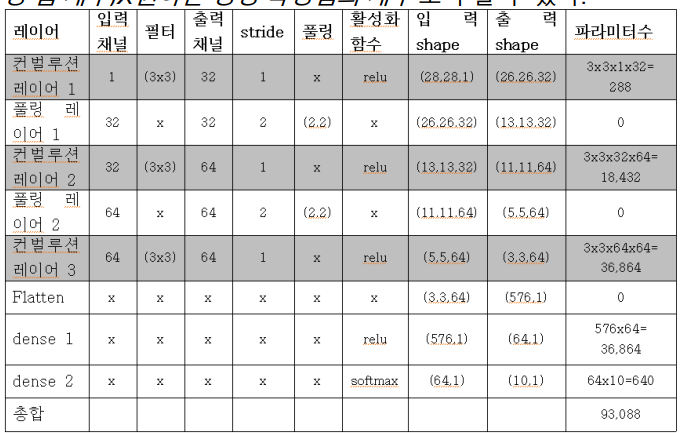

위 표를 비어놓고 채우라 함
코테 힌트
플립러닝 4차시 풀어보기
영상은 fashion mnist영상이다.이 데이터셋을 가지고 위에 했던것 처럼 CNN으로 인식하는 문제를 할거다. 여기는 다층 신경망인데 이걸 CNN으로 바꾸면 된다. 해결한 문제같은건 그대로 가져갈거다.
5번문제도 똑같이 다층문제인데 이건 바꾸고 해결할 문제는 동일하게 나올 예정
6번도 마찬가지 이것도 해봐야함
7번은 cnn과 lstm있는데 lstm은 뺴고 cnn모델 만드는것 까지만 하면 됨

#### RNN(순환 싱경망)

##### RNN의 이해
- 단일 이미지 객체 인식: CNN 적합
- 동영상(시계열 정보)에서 객체 움직임 인식: RNN 적합
- 기존 신경망 구조
  - 모든 입력과 출력이 독립적이라고 가정.
  - 시간에 따른 입출력 간의 관계는 고려되지 않음
- RNN
  - 이전의 정보가 현재 입력에 대한 결과를 유추할 때 사용되어 더 나은 결과 예측 도움
  - 이러한 시퀀스 데이터를 모델링하기 위해 소개된 딥러닝 알고리즘
  - 예: 구글 번역기

이번 코테에서 학습 결과 정확도를 스코어에 반영할 예정
- 네트워크도 직접 구성, 옵티마이저 등도 알아서 정하기

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# 데이터 구성

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
# train_image’s shape : (nb_samples, img_height, img_width)이므로 RNN타입과 동일
# Input data of RNN : (nb_samples, timesteps, input_dim)
# 픽셀값 0~1로 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0

one_hot_train_labels = to_categorical(train_labels, 10)
one_hot_test_labels = to_categorical(test_labels, 10)

# 모델 구성

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.SimpleRNN(units=64, input_shape = (28, 28),
return_sequences=False))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


### 23.11.23 코테 3

In [ ]:
# 데이터 불러오기

from tensorflow.keras.utils import to_categorical
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# 클래스 라벨링
class_names = ['ariplane', 'automobile', 'bird', 'cat', 'deer', 'cat', 'dog', 'frog', 'horse', 'ship', 'truck']

# 데이터 리쉐잎
train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3))

# 데이터 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0


170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
# 모델 구성
model = tf.keras.models.Sequential()

# Conv2D 레이어 추가
model.add(tf.keras.layers.Conv2D(32, (3, 3), strides=(1, 1), input_shape=(32,32, 3), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.3)) # 드롭아웃
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(58, (3, 3), strides=(1, 1), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.3)) # 드롭아웃
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'))# 파라미터 수: 3 x 3 x 64 x 64

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

# 모델 컴파일 (배치사이즈 512, 검증데이터 0.2, 에폭 20)
model.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.001),
              loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()
history = model.fit(train_images, train_labels, epochs = 10, batch_size = 64, validation_split = 0.2)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_22 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 activation_24 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 dropout_18 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_37 (Conv2D)          (None, 16, 16, 58)      

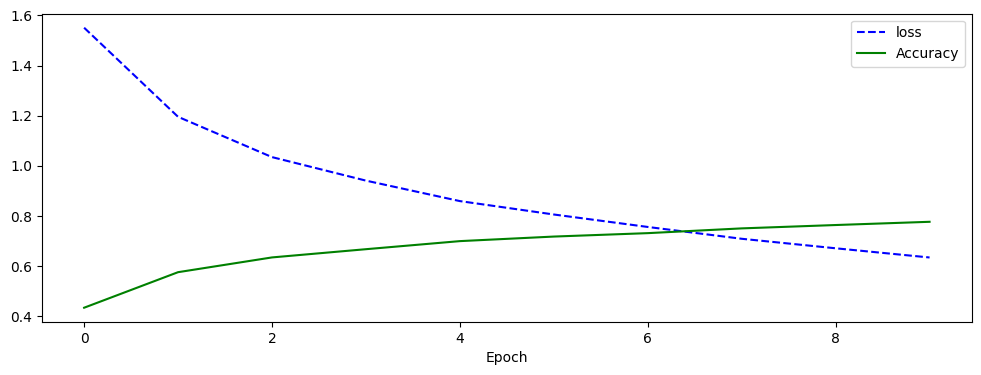

최적화 완료!


In [ ]:
plt.figure(figsize = (12,4))
plt.subplot(1, 1, 1)

plt.plot(history.history['loss'], 'b--', label = 'loss')
plt.plot(history.history['accuracy'], 'g-', label='Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
print('최적화 완료!')

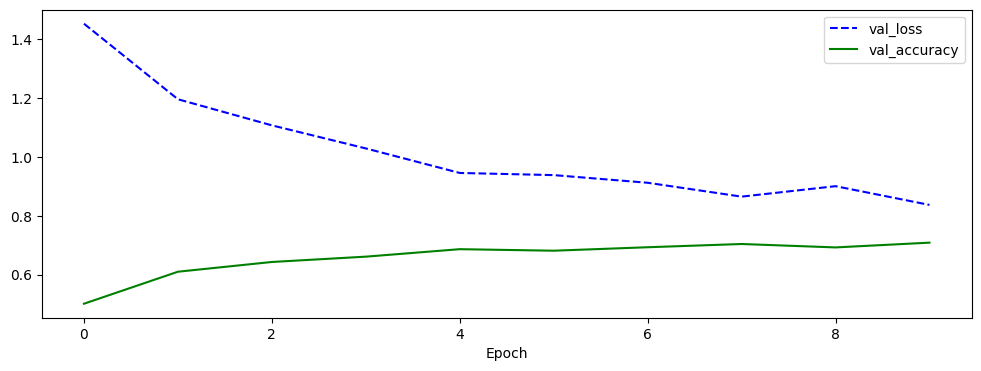

최적화 완료!


In [ ]:
plt.figure(figsize = (12,4))
plt.subplot(1, 1, 1)

plt.plot(history.history['val_loss'], 'b--', label = 'val_loss')

plt.plot(history.history['val_accuracy'], 'g-', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
print('최적화 완료!')

In [ ]:
print(history.__dict__)

{'validation_data': None, 'model': <keras.src.engine.sequential.Sequential object at 0x7fad996618d0>, '_chief_worker_only': None, '_supports_tf_logs': False, 'history': {'loss': [1.4511799812316895, 1.1039552688598633, 0.9561261534690857, 0.8604370355606079, 0.7905434370040894, 0.7353469133377075, 0.6875585913658142, 0.6503472924232483, 0.6195107698440552, 0.5842900276184082], 'accuracy': [0.4711250066757202, 0.6068999767303467, 0.6626750230789185, 0.6970250010490417, 0.7209749817848206, 0.7401999831199646, 0.7558249831199646, 0.7727500200271606, 0.7810750007629395, 0.791100025177002], 'val_loss': [1.4192382097244263, 1.3924330472946167, 1.1434814929962158, 1.0013582706451416, 0.9824058413505554, 0.952833890914917, 1.0676137208938599, 1.2072997093200684, 0.9273080825805664, 0.9167361259460449], 'val_accuracy': [0.49709999561309814, 0.5034999847412109, 0.6111000180244446, 0.6697999835014343, 0.6697999835014343, 0.6822999715805054, 0.6230999827384949, 0.5857999920845032, 0.68720000982284

In [ ]:
y_pred = model.predict(test_images).round(2)

y_val_label = list(map(np.argmax, test_labels))
y_pred_label = list(map(np.argmax, y_pred))

313/313 [==============================] - 1s 4ms/step


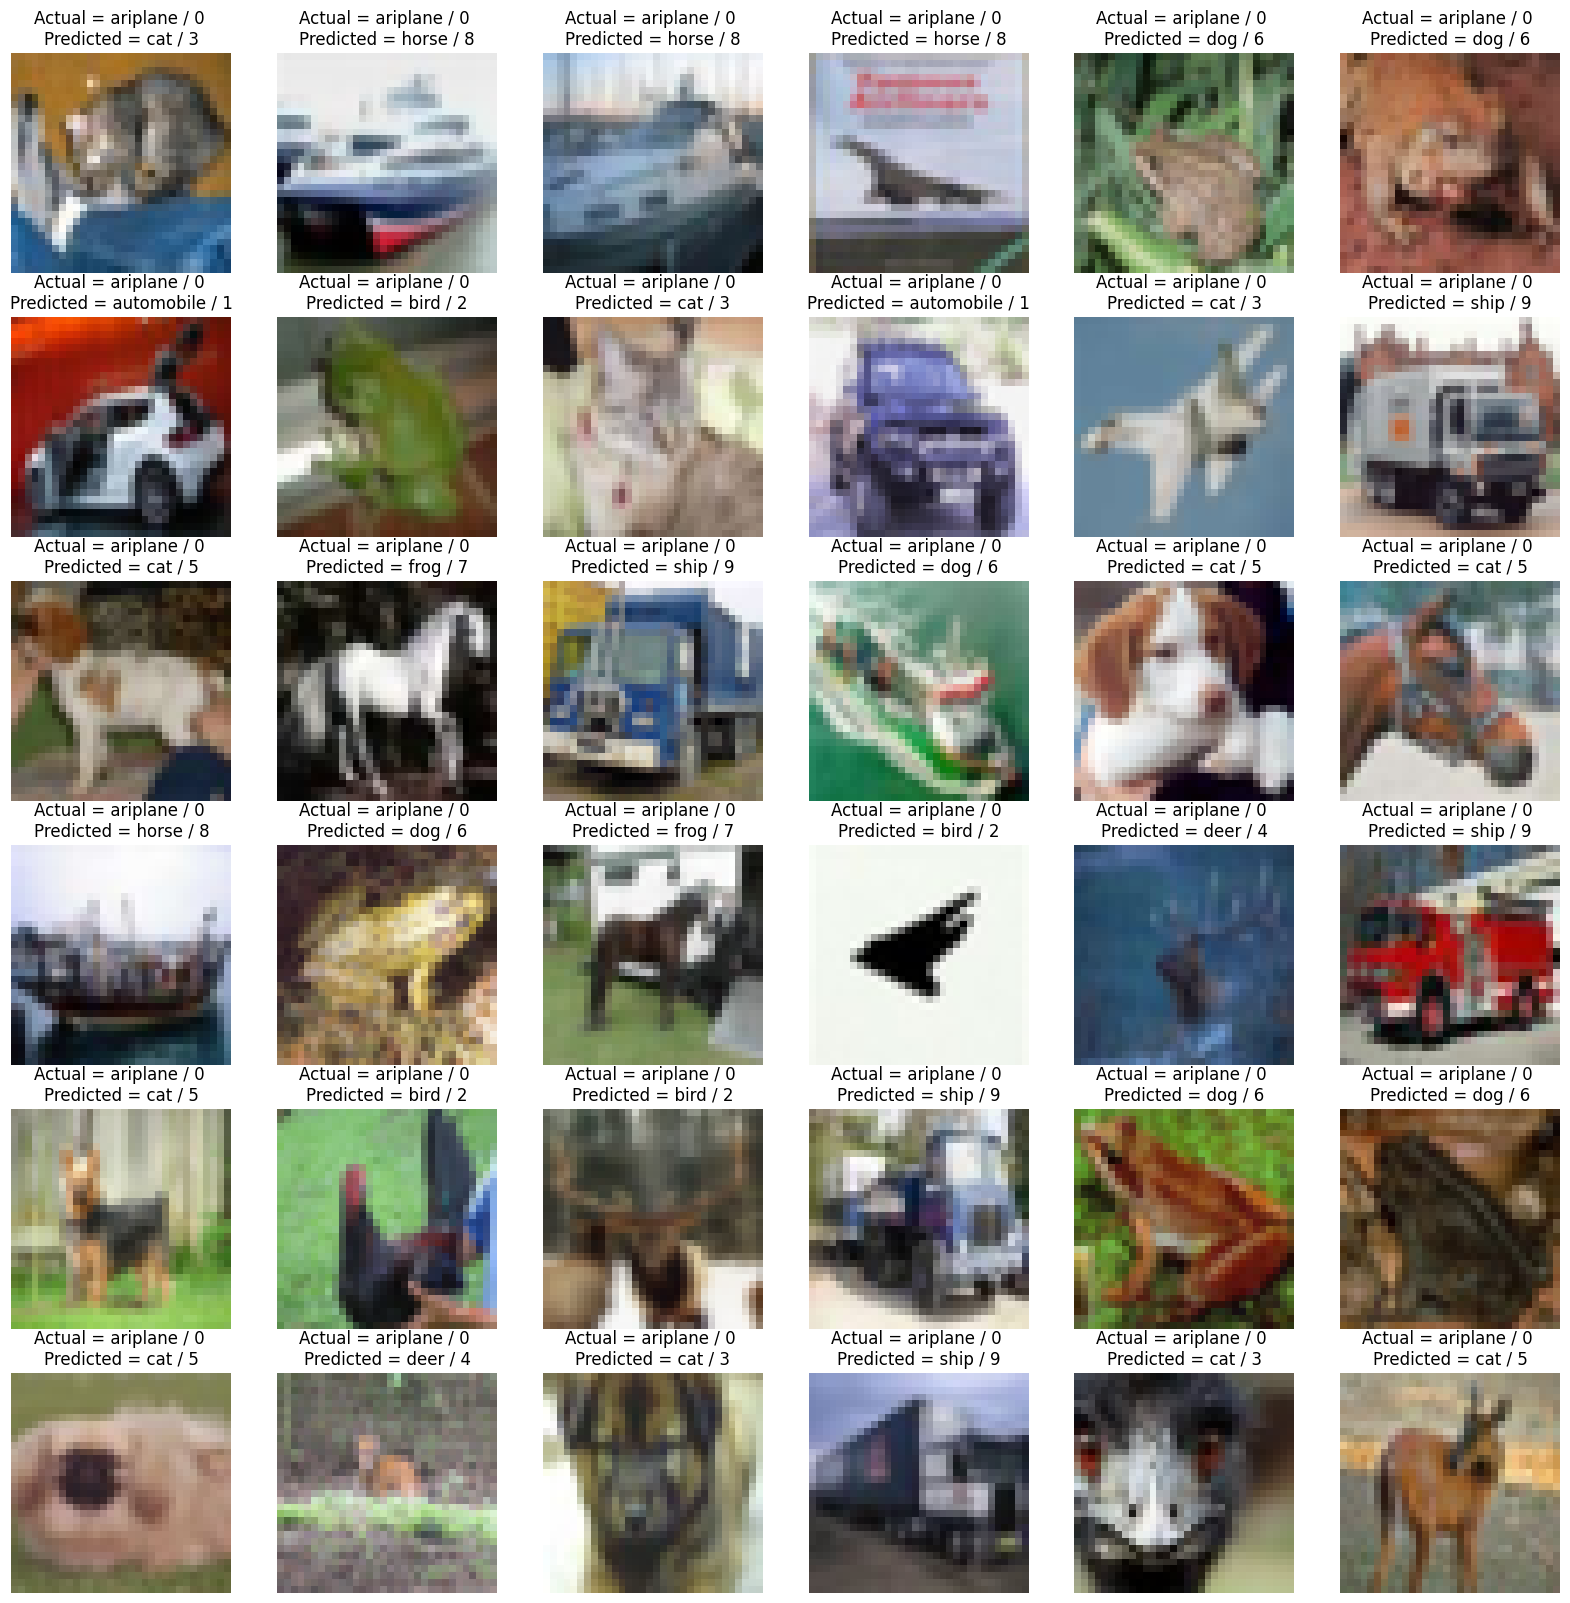

In [ ]:
aaa = np.array(y_val_label) != np.array(y_pred_label)

not_equel_list = np.where(aaa == True)[0]

plt.figure(figsize=(20,20))
j = 1
for i in not_equel_list[0:36]:
# for a in np.random.randint(0,206,36):
#     i = not_equel_list[a]
#     print(a)
    plt.subplot(6,6,j); j+=1
    plt.imshow(test_images[i].reshape(32,32,3),cmap = 'Greys')
    plt.axis('off')
    plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_names[y_val_label[i]],
                                                            y_val_label[i],
                                                            class_names[y_pred_label[i]],
                                                            y_pred_label[i]))

### 23.11.27

#### 순환 신경망

- RNN 모델구성
  - Tensorflow.keras.layers.SimpleRNN() 함수 사용
  - RNN cell의 노드(unit)수 : 64개
  - RNN의 Input_shape: (28(time step), 28(input))
  - RNN에서 Output되는 결과 : (batch_size, 64(output))
  - RNN에서 Output이 (batch_size, 64)가 벡터이므로 바로 FC layer로 입력 가능
  - FC layer: Dense 사용(Node: 10, Activation: Softmax)

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# 데이터 구성

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
# train_image’s shape : (nb_samples, img_height, img_width)이므로 RNN타입과 동일
# Input data of RNN : (nb_samples, timesteps, input_dim)

# 픽셀값 0~1로 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0

one_hot_train_labels = to_categorical(train_labels, 10)
one_hot_test_labels = to_categorical(test_labels, 10)

# 모델 구성

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.SimpleRNN(units=64, input_shape = (28, 28),
return_sequences=False))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


11490434/11490434 [==============================] - 0s 0us/step


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                5952      
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
Total params: 6602 (25.79 KB)
Trainable params: 6602 (25.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 22s 10ms/step - loss: 0.3762 - accuracy: 0.8892
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2622 - accuracy: 0.9230
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2199 - accuracy: 0.9355
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1937 - accuracy: 0.9437
Epoch 5/

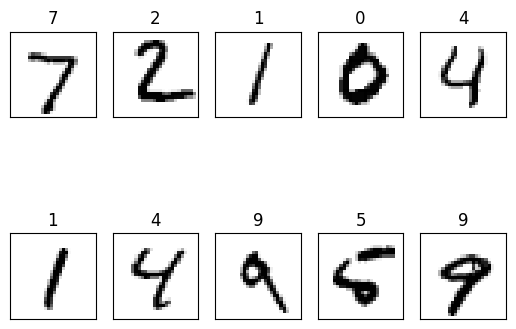

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

history = model.fit(train_images, one_hot_train_labels, epochs = 5, batch_size = 32)

labels=model.predict(test_images)
print("\n Accuracy: %4.f" % (model.evaluate(test_images, one_hot_test_labels)[1]))
fig = plt.figure()
for i in range(10):
  subplot = fig.add_subplot(2, 5, i + 1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%d' % np.argmax(labels[i]))
  subplot.imshow(test_images[i],
                 cmap = plt.cm.gray_r)
plt.show()

# 파라미터 (28 x 64) + (64, 이전 은닉층 값) + (64 x 64) = 5952

RNN 각 cell에서 hidden 값 출력하기
- return_sequence = True
  - RNN의 출력 shape : (Batch_size, time_steps, output_dims)
  - 뒤의 FC layer에 입력하기 위해서는 각 스텝 별 벡터를 1개 벡터로 변경해야함. 즉, FC layer 전에 Flatten()해야함
  - (Batch_size, time_steps, output_dims)




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 28, 64)            5952      
                                                                 
 flatten (Flatten)           (None, 1792)              0         
                                                                 
 dense_1 (Dense)             (None, 32)                57376     
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 63658 (248.66 KB)
Trainable params: 63658 (248.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 32s 15ms/step - loss: 0.2298 - accuracy: 0.9299
Epoch 2/5
1875/1875 [========================

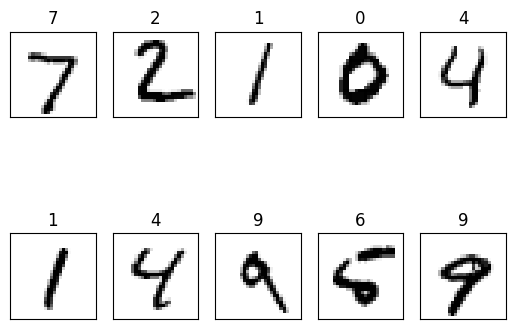

In [ ]:
# 모델 구성

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.SimpleRNN(units=64, input_shape = (28, 28),
return_sequences=True))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

history = model.fit(train_images, one_hot_train_labels, epochs = 5, batch_size = 32)

labels=model.predict(test_images)
print("\n Accuracy: %4.f" % (model.evaluate(test_images, one_hot_test_labels)[1]))
fig = plt.figure()
for i in range(10):
  subplot = fig.add_subplot(2, 5, i + 1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%d' % np.argmax(labels[i]))
  subplot.imshow(test_images[i],
                 cmap = plt.cm.gray_r)
plt.show()

#### 심층 순환 신경망

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 28, 64)            5952      
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 9386 (36.66 KB)
Trainable params: 9386 (36.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 63s 32ms/step - loss: 0.4899 - accuracy: 0.8525
Epoch 2/5
1875/1875 [==============================] - 82s 44ms/step - loss: 0.2513 - accuracy: 0.9255
Epoch 3/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0

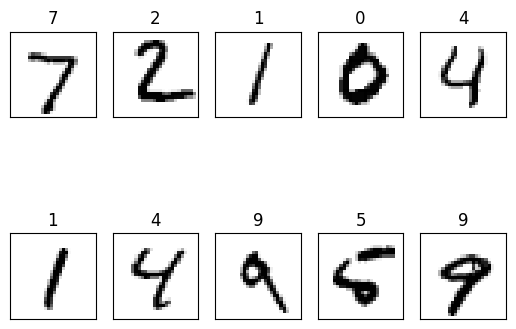

In [ ]:
# 모델 구성

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.SimpleRNN(units=64, input_shape = (28, 28),
return_sequences=True))
model.add(tf.keras.layers.SimpleRNN(units = 32))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

history = model.fit(train_images, one_hot_train_labels, epochs = 5, batch_size = 32)

labels=model.predict(test_images)
print("\n Accuracy: %4.f" % (model.evaluate(test_images, one_hot_test_labels)[1]))
fig = plt.figure()
for i in range(10):
  subplot = fig.add_subplot(2, 5, i + 1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%d' % np.argmax(labels[i]))
  subplot.imshow(test_images[i],
                 cmap = plt.cm.gray_r)
plt.show()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_11 (SimpleRNN)   (None, 28, 64)            5952      
                                                                 
 simple_rnn_12 (SimpleRNN)   (None, 28, 64)            8256      
                                                                 
 simple_rnn_13 (SimpleRNN)   (None, 32)                3104      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 17642 (68.91 KB)
Trainable params: 17642 (68.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 42s 80ms/step - loss: 0.5451 - accuracy: 0.8402
Epoch 2/5
469/469 [==============================

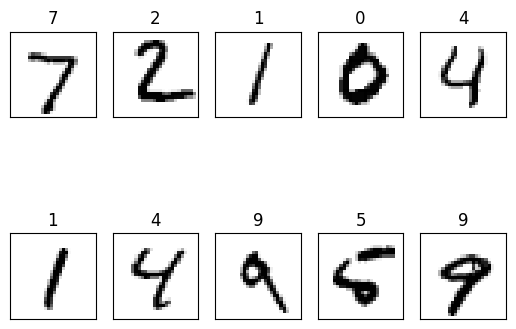

In [ ]:
# 모델 구성

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.SimpleRNN(units=64, input_shape = (28, 28), return_sequences=True))
model.add(tf.keras.layers.SimpleRNN(units=64, return_sequences=True))
model.add(tf.keras.layers.SimpleRNN(units = 32))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

history = model.fit(train_images, one_hot_train_labels, epochs = 5, batch_size = 128)

labels=model.predict(test_images)
print("\n Accuracy: %4.f" % (model.evaluate(test_images, one_hot_test_labels)[1]))
fig = plt.figure()
for i in range(10):
  subplot = fig.add_subplot(2, 5, i + 1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%d' % np.argmax(labels[i]))
  subplot.imshow(test_images[i],
                 cmap = plt.cm.gray_r)
plt.show()

### 23.11.30 LSTM, GRU, BIdirectional


#### LSTM

바닐라 RNN의 한계
- 짧은 sequence에 대해서만 효과를 보임
- 고려하는 Time Step이 길어질 수록 이전의 정보가 뒤쪽으로 충분히 전달되지 못하는 현상 발생
- **장기 의존성 문제(The problem of Long-Term Depencencies)**

장단기 메모리(LSTM)
- RNN의 장기 의존성 문제를 개선할 수 있고, 학습 또한 빠르게 수렴
- 시퀀스를 고려할 수 있는 딥러닝 알고리즘 중에 많이 사용
- 장기 기억을 위해서 **셀 상태**를 추가
- 기존의 RNN의 은닉 상태에 셀 상태가 추가된 구조
  - 장기 기억: 셀 상태 / 단기기억 : 가중치

LSTM의 구조
- 3개의 게이트로 구성
  - 삭제 게이트: 이전 셀 상태에서 삭제 시킬 기억 제어
  - 입력 게이트: 현재 입력 정보중 어느 것을 저장할지 제어
  - 출력 게이트: 셀 상태의 어느 부분을 읽어서 현재의 은닉 상태를 출력할 것인지 제어



시험어 ch7 40페이지 수식은 안나오지만 게이트별 역할이 뭔지 설명은 가능해야 함

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# 데이터 구성

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
# train_image’s shape : (nb_samples, img_height, img_width)이므로 RNN타입과 동일
# Input data of RNN : (nb_samples, timesteps, input_dim)

# 픽셀값 0~1로 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0

one_hot_train_labels = to_categorical(train_labels, 10)
one_hot_test_labels = to_categorical(test_labels, 10)

# 모델 구성

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=64, return_sequences = True, input_shape = (28, 28)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 28, 64)            23808     
                                                                 
 flatten_1 (Flatten)         (None, 1792)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                17930     
                                                                 
Total params: 41738 (163.04 KB)
Trainable params: 41738 (163.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/5
1875/1875 [==============================] - 17s 6ms/step - loss: 0.2323 - accuracy: 0.9295
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0784 - accuracy: 0.9753
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0535 - accuracy: 0.9833
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0427 - accuracy: 0.9861
Epoch 5/5
313/313 [==============================] - 2s 4ms/step - loss: 0.0411 - accuracy: 0.9867

 Accuracy:    1


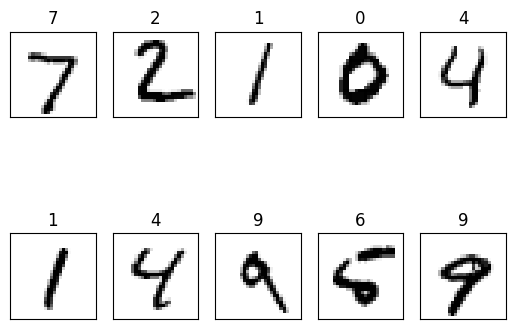

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(train_images, one_hot_train_labels, epochs = 5, batch_size = 32)

labels=model.predict(test_images)
print("\n Accuracy: %4.f" % (model.evaluate(test_images, one_hot_test_labels)[1]))
fig = plt.figure()
for i in range(10):
  subplot = fig.add_subplot(2, 5, i + 1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%d' % np.argmax(labels[i]))
  subplot.imshow(test_images[i],
                 cmap = plt.cm.gray_r)
plt.show()

# 파라미터 (28 x 64) + (64, 이전 은닉층 값) + (64 x 64) = 5952

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                23808     
                                                                 
 flatten_2 (Flatten)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 24458 (95.54 KB)
Trainable params: 24458 (95.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 13s 5ms/step - loss: 0.4210 - accuracy: 0.8663
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1388 - accuracy: 0.9585
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.

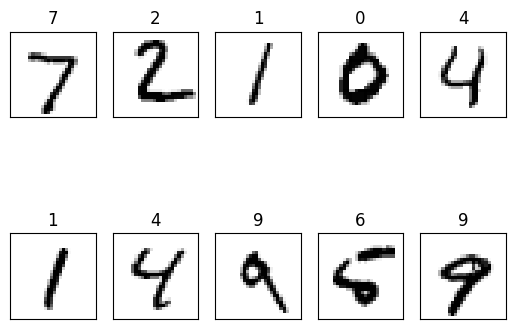

In [ ]:
# 모델 구성

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=64, return_sequences = False, input_shape = (28, 28)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(train_images, one_hot_train_labels, epochs = 5, batch_size = 32)

labels=model.predict(test_images)
print("\n Accuracy: %4.f" % (model.evaluate(test_images, one_hot_test_labels)[1]))
fig = plt.figure()
for i in range(10):
  subplot = fig.add_subplot(2, 5, i + 1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%d' % np.argmax(labels[i]))
  subplot.imshow(test_images[i],
                 cmap = plt.cm.gray_r)
plt.show()


#### GRU

LSTM의 게이트를 2개로 줄임
- Reset gate
  - 얼마나 많은 과거 기억을 잊을것인가
- Update gate
  - 어떤 기억을 버리고 새로운 기억을 더할것인가?

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                18048     
                                                                 
 flatten_3 (Flatten)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 18698 (73.04 KB)
Trainable params: 18698 (73.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 17s 8ms/step - loss: 0.4878 - accuracy: 0.8421
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1363 - accuracy: 0.9597
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0

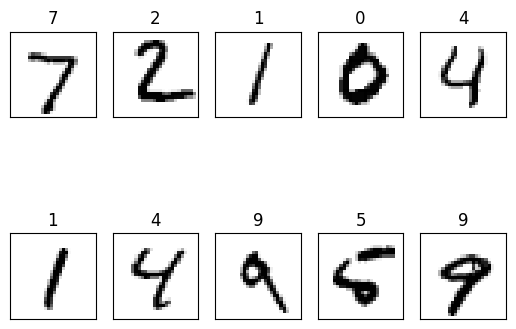

In [ ]:
# 모델 구성

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.GRU(units=64, return_sequences = False, input_shape = (28, 28)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(train_images, one_hot_train_labels, epochs = 5, batch_size = 32)

labels=model.predict(test_images)
print("\n Accuracy: %4.f" % (model.evaluate(test_images, one_hot_test_labels)[1]))
fig = plt.figure()
for i in range(10):
  subplot = fig.add_subplot(2, 5, i + 1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%d' % np.argmax(labels[i]))
  subplot.imshow(test_images[i],
                 cmap = plt.cm.gray_r)
plt.show()


#### bidirectional

Epoch 1/5
1875/1875 [==============================] - 60s 30ms/step - loss: 0.2395 - accuracy: 0.9272
Epoch 2/5
1875/1875 [==============================] - 74s 40ms/step - loss: 0.1253 - accuracy: 0.9644
Epoch 3/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1018 - accuracy: 0.9715
Epoch 4/5
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0953 - accuracy: 0.9742
Epoch 5/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0807 - accuracy: 0.9777
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_3 (Bidirecti  (32, 28, 128)             11904     
 onal)                                                           
                                                                 
 flatten_7 (Flatten)         (32, 3584)                0         
                                                                 


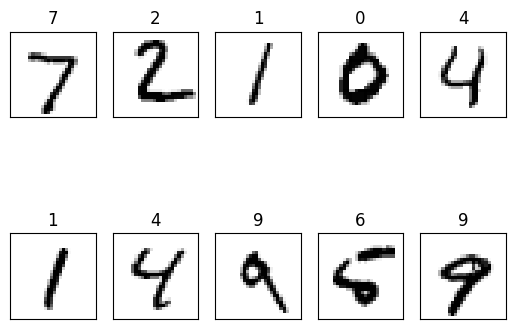

In [ ]:
# 모델 구성
from tensorflow.keras.layers import Bidirectional
model = tf.keras.models.Sequential()
model.add(Bidirectional(SimpleRNN(units=64, return_sequences = True, input_shape = (28, 28))))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))


model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(train_images, one_hot_train_labels, epochs = 5, batch_size = 32)
model.summary()
labels=model.predict(test_images)
print("\n Accuracy: %4.f" % (model.evaluate(test_images, one_hot_test_labels)[1]))
fig = plt.figure()
for i in range(10):
  subplot = fig.add_subplot(2, 5, i + 1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%d' % np.argmax(labels[i]))
  subplot.imshow(test_images[i],
                 cmap = plt.cm.gray_r)
plt.show()


Epoch 1/5
1875/1875 [==============================] - 45s 16ms/step - loss: 0.1982 - accuracy: 0.9355
Epoch 2/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0633 - accuracy: 0.9804
Epoch 3/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0455 - accuracy: 0.9858
Epoch 4/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0357 - accuracy: 0.9890
Epoch 5/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0289 - accuracy: 0.9909
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirecti  (32, 28, 128)             47616     
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (32, 28, 128)             98816     
 onal)                                                           


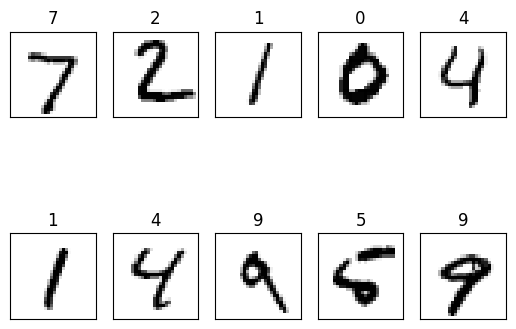

In [ ]:
# 심층 바이디렉션 LSTM
from tensorflow.keras.layers import Bidirectional, LSTM

model = tf.keras.models.Sequential()
model.add(Bidirectional(LSTM(units=64, return_sequences = True, input_shape = (28, 28))))
model.add(Bidirectional(LSTM(units=64, return_sequences = True)))
model.add(Bidirectional(LSTM(units=64, return_sequences = True)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))


model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(train_images, one_hot_train_labels, epochs = 5, batch_size = 32)
model.summary()
labels=model.predict(test_images)
print("\n Accuracy: %4.f" % (model.evaluate(test_images, one_hot_test_labels)[1]))
fig = plt.figure()
for i in range(10):
  subplot = fig.add_subplot(2, 5, i + 1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%d' % np.argmax(labels[i]))
  subplot.imshow(test_images[i],
                 cmap = plt.cm.gray_r)
plt.show()


Epoch 1/5
1875/1875 [==============================] - 56s 22ms/step - loss: 0.2088 - accuracy: 0.9330
Epoch 2/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0673 - accuracy: 0.9790
Epoch 3/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0471 - accuracy: 0.9853
Epoch 4/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0389 - accuracy: 0.9876
Epoch 5/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0320 - accuracy: 0.9900
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_7 (Bidirecti  (32, 28, 128)             47616     
 onal)                                                           
                                                                 
 bidirectional_8 (Bidirecti  (32, 28, 128)             98816     
 onal)                                                           


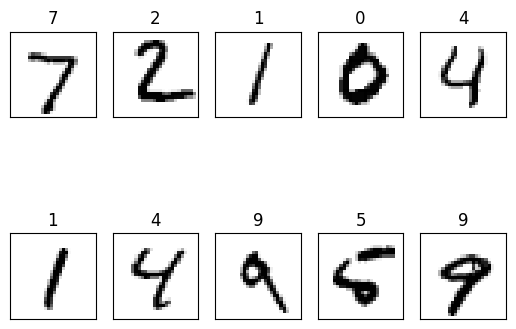

In [ ]:
# 심층 바이디렉션 LSTM + 중간에 dense 층
from tensorflow.keras.layers import Bidirectional, LSTM

model = tf.keras.models.Sequential()
model.add(Bidirectional(LSTM(units=64, return_sequences = True, input_shape = (28, 28))))
model.add(Bidirectional(LSTM(units=64, return_sequences = True)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(Bidirectional(LSTM(units=64, return_sequences = True)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))


model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(train_images, one_hot_train_labels, epochs = 5, batch_size = 32)
model.summary()
labels=model.predict(test_images)
print("\n Accuracy: %4.f" % (model.evaluate(test_images, one_hot_test_labels)[1]))
fig = plt.figure()
for i in range(10):
  subplot = fig.add_subplot(2, 5, i + 1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%d' % np.argmax(labels[i]))
  subplot.imshow(test_images[i],
                 cmap = plt.cm.gray_r)
plt.show()


---
여기까지 해커톤 테스트 범위

해커톤 힌트 ch7 63page


### 23.12.04 GAN

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM, Reshape
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# 픽셀값 0~1로 정규화
train_images = train_images.reshape((50000,32,32,3))
test_images = test_images.reshape((10000,32,32,3))
train_images, test_images = train_images / 255.0, test_images / 255.0

# 데이터 레이블 one hot 코드 변경
one_hot_train_labels = to_categorical(train_labels, 10)
one_hot_test_labels = to_categorical(test_labels, 10)

model = Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', strides=(1, 1), input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu'))



170498071/170498071 [==============================] - 5s 0us/step


In [ ]:
from tensorflow.keras.optimizers import Adam

model.add(Reshape(target_shape = (16,13*13)))
model.add(LSTM(30, input_shape = (16,13*13), return_sequences = False))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(train_images, one_hot_train_labels, epochs=5,
batch_size=32)
print("\n=============test results==========")
labels=model.predict(test_images)
print("\n Accuracy: %.4f" % (model.evaluate(test_images,one_hot_test_labels)[1]))
print("===================================")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        4624      
                                                                 
 reshape (Reshape)           (None, 16, 169)           0         
                                                                 
 lstm (LSTM)                 (None, 30)                24000     
                                                                 
 dense (Dense)               (None, 10)                310       
                                                        

플립러닝 7번과 비슷한 문제 해커톤에 출제

#### GAN

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0
one_hot_train_labels = to_categorical(train_labels, 10
one_hot_test_labes = to_categorical(test_labels, 10)

In [ ]:
n_output = 784
n_noise = 128

generator = Sequential()

generator.add(Dense(units = 256, input_dim = n_noise, activation = 'relu'))
generator.add(Dense(units = 512, activation = 'relu'))
generator.add(Dense(units = n_output, activation = 'tanh'))

In [ ]:
discriminator = Sequential()
discriminator.add(Dense(256, input_dim = n_output, activation = 'relu'))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(1, activation = 'sigmoid'))

In [ ]:
s_model = tf.keras.models.Sequential()
s_model.add(tf.keras.layers.Dense(units = 256, input_shape = (128, ), activation = 'relu'))
s_model.add(tf.keras.layers.Dense(units = 256, activation = 'relu'))
s_model.add(tf.keras.layers.Dense(units = 256, activation = 'sigmoid'))

In [ ]:
inputs = tf.keras.Input(shape = (128, ))
x = tf.keras.layers.Dense(units = 256, activation = 'relu')(inputs)
x = tf.keras.layers.Dense(units = 512, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(units = 1, activation = 'sigmoid')(x)
model = tf.keras.models.Model(inputs = inputs, outputs = outputs)

### 23.12.07 GAN2

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Reshape, Dropout
from tensorflow.keras.datasets import mnist

In [ ]:
# 이미지크기, 노이즈벡터 크기
n_output = 784
n_noise = 128

# 생성자 모델 정의, 128차원의 랜덤 노이즈 벡터를 입력 받아서 784차원의 벡터(28x28)이미지 출력
generator = Sequential()
generator.add(Dense(units = 256, input_dim = n_noise, activation = 'relu'))
generator.add(Dense(units = 512, activation = 'relu'))
generator.add(Dense(units = n_output, activation = 'tanh'))

# 판별자 모델 정의
discriminator = Sequential()
discriminator.add(Dense(256, input_dim = n_output, activation = 'relu'))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(1, activation = 'sigmoid'))

# 생성자와 판별자 모델을 통합한 GAN 모델 구현
g_input = Input(shape = (n_noise,))
g_output = discriminator(generator(g_input))
gan = Model(g_input, g_output)

# 판별자 모델 학습을 위한 최적화 함수 및 손실 함수 설정
discriminator.trainable =True
adam = tf.keras.optimizers.legacy.Adam(lr = 0.0002, beta_1 = 0.5)
discriminator.compile(loss = 'binary_crossentropy', optimizer = adam)

# GAN 모델 학습을 위한 최적화 함수 및 손실 함수 설정

# GAN 모델에 대한 학습은 오직 생성자에 대한 가중치 업데이트가 수행되어야 하므로
# 판별자 모델의 학습 여부를 False로 설정함
discriminator.trainable = False
gan.compile(loss='binary_crossentropy', optimizer = adam)

gan.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128)]             0         
                                                                 
 sequential (Sequential)     (None, 784)               566800    
                                                                 
 sequential_1 (Sequential)   (None, 1)                 201217    
                                                                 
Total params: 768017 (2.93 MB)
Trainable params: 566800 (2.16 MB)
Non-trainable params: 201217 (786.00 KB)
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
n_epoch = 100
batch_size = 128
saving_interval = 10

# 데이터셋 불러오기
# 모델 학습을 위해서는 훈련 이미지만 사용할 것이기 때문에 train_images만 로드
(train_images, _), (_, _) = mnist.load_data()

buffer_size = len(train_images) # 60000
train_images = train_images.reshape((buffer_size, n_output)) # 28 x 28

# 이미지 픽셀값을 [-1 ~ 1]로 정규화
train_images = (train_images - 127.5) / 127.5

train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(buffer_size).batch(batch_size)

11490434/11490434 [==============================] - 1s 0us/step


Epoch Num : 1/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 2/100
3/3 [==============================] - 0s 7ms/step
epoch: 2 d_loss: 0.5577 g_loss: 0.8706
1/1 [==============================] - 0s 79ms/step


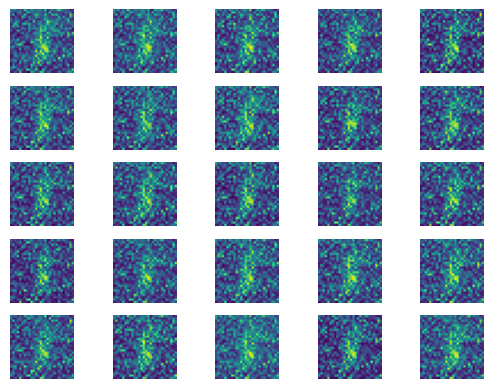

Epoch Num : 3/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 4/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 5/100
3/3 [==============================] - 0s 6ms/step
Epoch Num : 6/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 7/100
3/3 [==============================] - 0s 4ms/step
Epoch Num : 8/100
3/3 [==============================] - 0s 5ms/step
Epoch Num : 9/100
3/3 [==============================] - 0s 4ms/step
Epoch Num : 10/100
3/3 [==============================] - 0s 5ms/step
epoch: 10 d_loss: 0.4151 g_loss: 1.4137
1/1 [==============================] - 0s 19ms/step


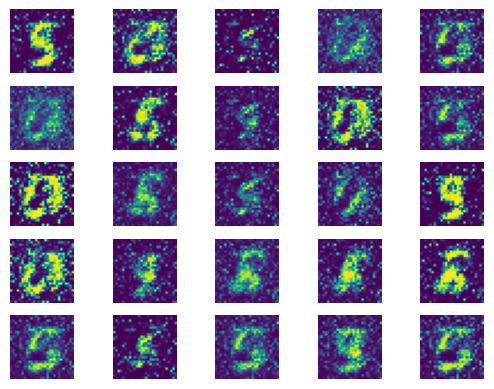

Epoch Num : 11/100
3/3 [==============================] - 0s 4ms/step
Epoch Num : 12/100
3/3 [==============================] - 0s 4ms/step
Epoch Num : 13/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 14/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 15/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 16/100
3/3 [==============================] - 0s 4ms/step
Epoch Num : 17/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 18/100
3/3 [==============================] - 0s 4ms/step
Epoch Num : 19/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 20/100
3/3 [==============================] - 0s 4ms/step
epoch: 20 d_loss: 0.5749 g_loss: 0.9869
1/1 [==============================] - 0s 33ms/step


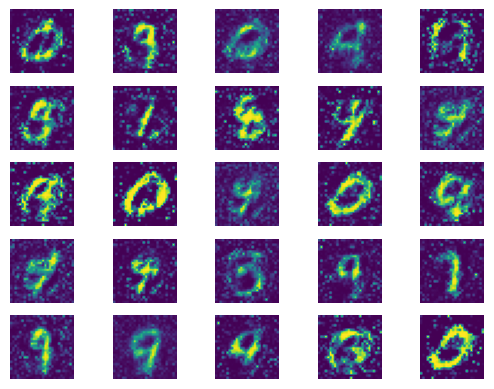

Epoch Num : 21/100
3/3 [==============================] - 0s 4ms/step
Epoch Num : 22/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 23/100
3/3 [==============================] - 0s 4ms/step
Epoch Num : 24/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 25/100
3/3 [==============================] - 0s 4ms/step
Epoch Num : 26/100
3/3 [==============================] - 0s 4ms/step
Epoch Num : 27/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 28/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 29/100
3/3 [==============================] - 0s 4ms/step
Epoch Num : 30/100
3/3 [==============================] - 0s 4ms/step
epoch: 30 d_loss: 0.6541 g_loss: 0.8869
1/1 [==============================] - 0s 18ms/step


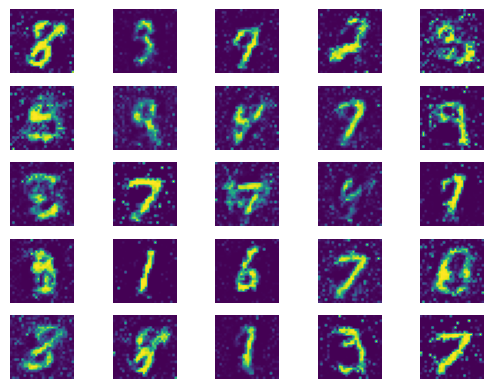

Epoch Num : 31/100
3/3 [==============================] - 0s 7ms/step
Epoch Num : 32/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 33/100
3/3 [==============================] - 0s 4ms/step
Epoch Num : 34/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 35/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 36/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 37/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 38/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 39/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 40/100
3/3 [==============================] - 0s 4ms/step
epoch: 40 d_loss: 0.6574 g_loss: 0.8808
1/1 [==============================] - 0s 40ms/step


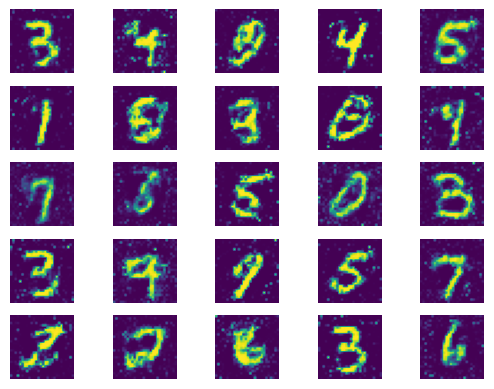

Epoch Num : 41/100
3/3 [==============================] - 0s 4ms/step
Epoch Num : 42/100
3/3 [==============================] - 0s 5ms/step
Epoch Num : 43/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 44/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 45/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 46/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 47/100
3/3 [==============================] - 0s 4ms/step
Epoch Num : 48/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 49/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 50/100
3/3 [==============================] - 0s 4ms/step
epoch: 50 d_loss: 0.6480 g_loss: 0.8544
1/1 [==============================] - 0s 27ms/step


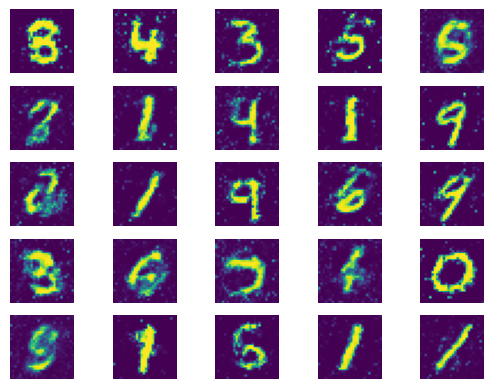

Epoch Num : 51/100
3/3 [==============================] - 0s 4ms/step
Epoch Num : 52/100
3/3 [==============================] - 0s 6ms/step
Epoch Num : 53/100
3/3 [==============================] - 0s 4ms/step
Epoch Num : 54/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 55/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 56/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 57/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 58/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 59/100
3/3 [==============================] - 0s 4ms/step
Epoch Num : 60/100
3/3 [==============================] - 0s 3ms/step
epoch: 60 d_loss: 0.6636 g_loss: 0.7511
1/1 [==============================] - 0s 20ms/step


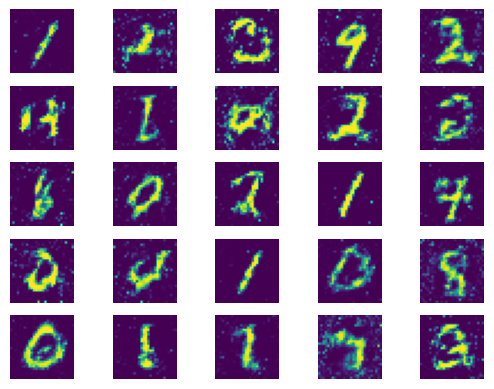

Epoch Num : 61/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 62/100
3/3 [==============================] - 0s 4ms/step
Epoch Num : 63/100
3/3 [==============================] - 0s 4ms/step
Epoch Num : 64/100
3/3 [==============================] - 0s 4ms/step
Epoch Num : 65/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 66/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 67/100
3/3 [==============================] - 0s 5ms/step
Epoch Num : 68/100
3/3 [==============================] - 0s 5ms/step
Epoch Num : 69/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 70/100
3/3 [==============================] - 0s 4ms/step
epoch: 70 d_loss: 0.6815 g_loss: 0.7849
1/1 [==============================] - 0s 18ms/step


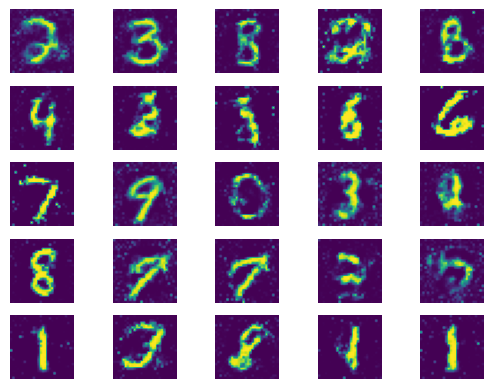

Epoch Num : 71/100
3/3 [==============================] - 0s 4ms/step
Epoch Num : 72/100
3/3 [==============================] - 0s 4ms/step
Epoch Num : 73/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 74/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 75/100
3/3 [==============================] - 0s 4ms/step
Epoch Num : 76/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 77/100
3/3 [==============================] - 0s 5ms/step
Epoch Num : 78/100
3/3 [==============================] - 0s 5ms/step
Epoch Num : 79/100
3/3 [==============================] - 0s 6ms/step
Epoch Num : 80/100
3/3 [==============================] - 0s 3ms/step
epoch: 80 d_loss: 0.6610 g_loss: 0.7908
1/1 [==============================] - 0s 25ms/step


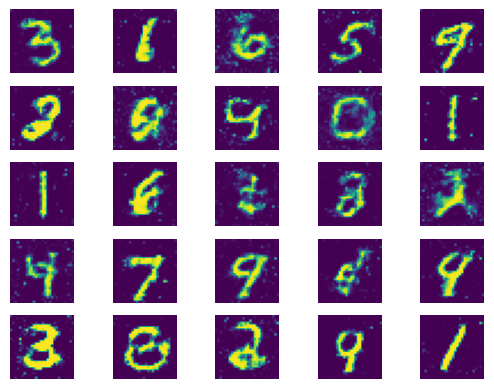

Epoch Num : 81/100
3/3 [==============================] - 0s 5ms/step
Epoch Num : 82/100
3/3 [==============================] - 0s 5ms/step
Epoch Num : 83/100
3/3 [==============================] - 0s 7ms/step
Epoch Num : 84/100
3/3 [==============================] - 0s 5ms/step
Epoch Num : 85/100
3/3 [==============================] - 0s 6ms/step
Epoch Num : 86/100
3/3 [==============================] - 0s 5ms/step
Epoch Num : 87/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 88/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 89/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 90/100
3/3 [==============================] - 0s 3ms/step
epoch: 90 d_loss: 0.6771 g_loss: 0.7612
1/1 [==============================] - 0s 31ms/step


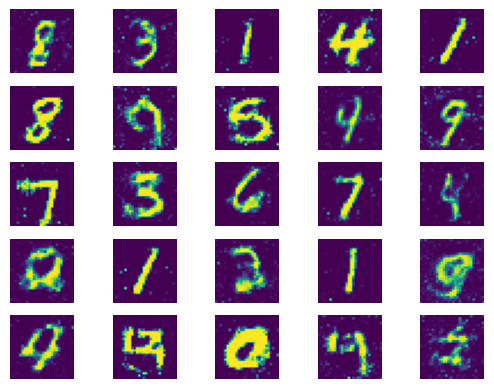

Epoch Num : 91/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 92/100
3/3 [==============================] - 0s 4ms/step
Epoch Num : 93/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 94/100
3/3 [==============================] - 0s 5ms/step
Epoch Num : 95/100
3/3 [==============================] - 0s 7ms/step
Epoch Num : 96/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 97/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 98/100
3/3 [==============================] - 0s 5ms/step
Epoch Num : 99/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 100/100
3/3 [==============================] - 0s 6ms/step
epoch: 100 d_loss: 0.6852 g_loss: 0.7562
1/1 [==============================] - 0s 27ms/step


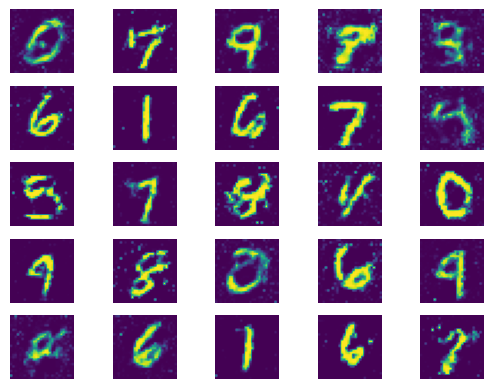

In [ ]:
for i in range(n_epoch):
  print('Epoch Num : {}/{}'.format((i+1), n_epoch))

  for image_batch in train_dataset:
    n_bt_imgs = len(image_batch)
    true_labels = np.ones((n_bt_imgs, 1))
    fake_labels = np.zeros((n_bt_imgs, 1))

    d_loss_real = discriminator.train_on_batch(image_batch, true_labels)

    noise = np.random.normal(0, 1, (n_bt_imgs, n_noise))
    gen_imgs = generator.predict(noise)
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    g_loss = gan.train_on_batch(noise, true_labels)

  if (i + 1) % saving_interval == 0 or i == 1:
    print('epoch: %d' % (i + 1),
          'd_loss: %.4f' % d_loss, 'g_loss: %.4f' % g_loss)

    noise = np.random.normal(0, 1, (25, n_noise))
    gen_imgs = generator.predict(noise)

    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(5, 5)
    count = 0
    for j in range(5):
      for k in range(5):
        axs[j, k].imshow(np.reshape(gen_imgs[count], (28, 28)))
        axs[j, k].axis('off')
        count += 1

    plt.show()



### 23.12.11 Upgraded gan

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128)]             0         
                                                                 
 sequential (Sequential)     (None, 784)               1493520   
                                                                 
 sequential_1 (Sequential)   (None, 1)                 1460225   
                                                                 
Total params: 2953745 (11.27 MB)
Trainable params: 1493520 (5.70 MB)
Non-trainable params: 1460225 (5.57 MB)
_________________________________________________________________
11490434/11490434 [==============================] - 1s 0us/step
Epoch Num : 1/100
3/3 [==============================] - 0s 4ms/step
Epoch Num : 2/100
3/3 [==============================] - 0s 7ms/step
Epoch:2 d_loss:0.4919  g_loss:1.9484
1/1 [==============================] - 0s 

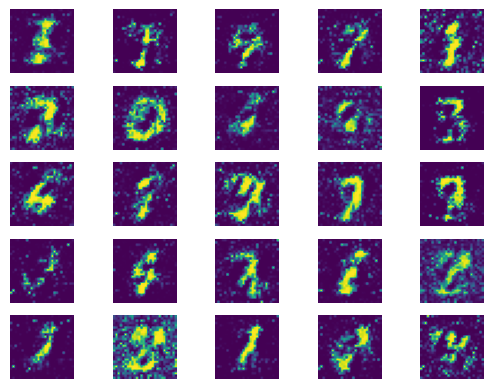

Epoch Num : 3/100
3/3 [==============================] - 0s 7ms/step
Epoch Num : 4/100
3/3 [==============================] - 0s 6ms/step
Epoch Num : 5/100
3/3 [==============================] - 0s 5ms/step
Epoch Num : 6/100
3/3 [==============================] - 0s 8ms/step
Epoch Num : 7/100
3/3 [==============================] - 0s 6ms/step
Epoch Num : 8/100
3/3 [==============================] - 0s 5ms/step
Epoch Num : 9/100
3/3 [==============================] - 0s 5ms/step
Epoch Num : 10/100
3/3 [==============================] - 0s 6ms/step
Epoch:10 d_loss:0.5768  g_loss:1.0956
1/1 [==============================] - 0s 20ms/step


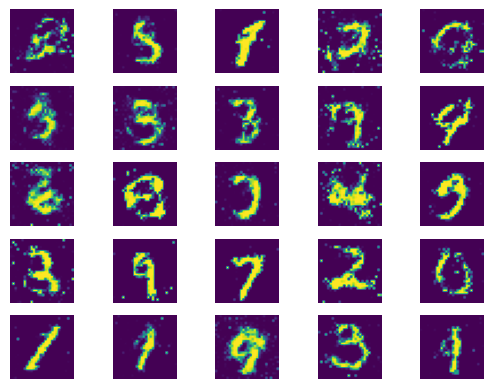

Epoch Num : 11/100
3/3 [==============================] - 0s 5ms/step
Epoch Num : 12/100
3/3 [==============================] - 0s 3ms/step
Epoch Num : 13/100
3/3 [==============================] - 0s 7ms/step
Epoch Num : 14/100
3/3 [==============================] - 0s 7ms/step
Epoch Num : 15/100
3/3 [==============================] - 0s 5ms/step
Epoch Num : 16/100
3/3 [==============================] - 0s 4ms/step


KeyboardInterrupt: ignored

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Dropout
from tensorflow.keras.models import Sequential, Model
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

n_output = 784   # 28×28 이미지 크기
n_noise = 128    # 랜덤 노이즈 벡터 크기

# 생성자 모델 정의
# 128차원의 랜덤 노이즈 벡터를 입력받아서 784차원의 벡터(28×28)이미지를 출력
generator = Sequential()
generator.add(Dense(units=256 , input_dim=n_noise))
generator.add(LeakyReLU(0.2))
generator.add(Dense(units=512 ))
generator.add(LeakyReLU(0.2))
generator.add(Dense(units=1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(units=n_output, activation='tanh'))

# 판별자 모델 정의
discriminator = Sequential()
discriminator.add(Dense(1024, input_dim=n_output))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(512))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(1, activation='sigmoid'))

# 생성자와 판별자 모델을 통합한 GAN 모델 구현
g_input = Input(shape=(n_noise,))
g_output = discriminator(generator(g_input))
gan = Model(g_input, g_output)

# 판별자 모델 학습을 위한 최적화 함수 및 손실 함수 설정
discriminator.trainable = True
adam = tf.optimizers.legacy.Adam(learning_rate=0.0002, beta_1=0.5)
discriminator.compile(loss='binary_crossentropy', optimizer=adam)


# GAN 모델 학습을 위한 최적화 함수 및 손실 함수 설정
# GAN 모델에 대한 학습은 오직 생성자에 대한 가중치 업데이트가 수행되어야 하므로 판별자 모델의 학습 여부를 False로 설정함
discriminator.trainable = False
gan.compile(loss='binary_crossentropy', optimizer=adam)

# GAN 모델 구조 출력
gan.summary()

# 모델 학습
n_epoch = 100
batch_size = 128
saving_interval = 10

# MNIST 데이터 불러오기
# 모델 학습을 위해서는 훈련 이미지만 사용할 것이기 때문에 train_images만 로드
(train_images, _), (_, _) = mnist.load_data()

buffer_size = len(train_images)  # 60000
train_images = train_images.reshape((buffer_size, n_output)) #28x28

# 이미지 픽셀값을 [–1~1]로 정규화
train_images = (train_images - 127.5) / 127.5

train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(buffer_size).batch(batch_size)

for i in range(n_epoch):
    print('Epoch Num : {}/{}'.format((i + 1), n_epoch))

    # 1) 미니-배치별 모델 가중치 갱신 및 오차 계산
    for image_batch in train_dataset:    # 미니-배치별 가중치 갱신
        # 현재 배치 크기만큼 진짜 및 가짜 레이블 배열 생성
        n_bt_imgs = len(image_batch)
        true_labels = np.ones((n_bt_imgs, 1))  # 진짜 레이블(1) 생성
        fake_labels = np.zeros((n_bt_imgs, 1)) # 가짜 레이블(0) 생성

        # 현재 배치에 대한 판별자 모델의 가중치 1회 갱신 및 오차 갱신
        # 진짜 이미지에 대한 판별자 모델 가중치 갱신 및 오차 계산
        d_loss_real = discriminator.train_on_batch(image_batch, true_labels)
        # 가짜 이미지에 대한 판별자 모델 가중치 갱신 및 오차 계산
        noise = np.random.normal(0, 1, (n_bt_imgs, n_noise))
        gen_imgs = generator.predict(noise)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # 현재 배치에 대한 GAN 모델 가중치 1회 갱신 및 오차 계산
        g_loss = gan.train_on_batch(noise, true_labels)

    # 2) 중간 과정 생성되는 이미지 확인
    if (i +1) % saving_interval == 0 or i == 1:
        print('Epoch:%d' % (i + 1),
             'd_loss:%.4f' % d_loss, ' g_loss:%.4f' % g_loss)

        # 학습된 생성자 모델을 이용하여 25개의 이미지 생성
        noise = np.random.normal(0, 1, (25, n_noise))  # 25개의 노이즈 벡터 생성
        gen_imgs = generator.predict(noise)  # 생성자를 이용한 25개의 이미지 생성

        # 이미지 픽셀값 0~1로 조정
        #gen_imgs = 0.5 * gen_imgs + 0.5

       # 생성된 이미지 출력 및 저장
        fig, axs = plt.subplots(5, 5)
        count = 0
        for j in range(5):
            for k in range(5):
                axs[j, k].imshow(np.reshape(gen_imgs[count], (28, 28)))
                axs[j, k].axis('off')
                count += 1
        plt.show()
        #fig.savefig("gan_results/g_mnist_%d.png" % (i + 1))

사전 학습, 전이학습, 파인튜닝 등 별책 부록도 시험에 나옴
파인튜닝은 전이학습에 포함된다.

In [ ]:
import tensorflow as tf
from PIL import Image #이미지 분석 및 처리 Pillow 라이브러리
import numpy as np
import matplotlib.pyplot as plt
#TensorFlow Hub는 재사용 가능한 머신러닝을 위한 개방형 리포지토리 및 라이브러리
import tensorflow_hub as hub
import functools
import os

#load image
def load_image(image_path):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_image(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, (256,256))
  #tr.newaxis를 이용한 reshape방법. 맨 앞에 shape 1이 추가 (원래 image(256,256,3))=>(1,256,256,3)
  image = image[tf.newaxis,:]
  #print(image)
  return image

def tensor2image(image):
  image = image*255.0
  image = np.array(image, dtype=np.uint8)
  return Image.fromarray(image)

content_image = load_image('/content/drive/MyDrive/content1.png')
style_image = load_image('/content/drive/MyDrive/style1.jpg')

hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0][0]
#stylized_image = outputs[0][0]

final_image = tensor2image(stylized_image)
if final_image.mode != 'RGB':
    final_image = final_image.convert('RGB')
final_image.save('/content/drive/MyDrive/stylized_image1.jpg')

### 코테 3

#### 소타모델

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Dropout, MaxPooling2D, Reshape, LSTM, Dense, Flatten, Bidirectional, SimpleRNN
from tensorflow.keras.optimizers import Adam

# 데이터셋 로드
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data()

# 클래스 이름 정의
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]


# 픽셀 값을 [0, 1] 범위로 정규화
train_images = train_images.reshape((50000, 32, 32, 3)).astype('float32') / 255.0
test_images = test_images.reshape((10000, 32, 32, 3)).astype('float32') / 255.0

# 레이블을 원-핫 인코딩으로 변환
one_hot_train_labels = to_categorical(train_labels, 100)
one_hot_test_labels = to_categorical(test_labels, 100)


169001437/169001437 [==============================] - 6s 0us/step


In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Dropout, MaxPool2D, Reshape, LSTM, Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.initializers import RandomNormal, Constant

# 모델 정의
model = Sequential()


# 블럭 구조도
# 컨볼루션 레이어 + 배치 정규화 + relu 활성화 함수
# 컨볼루션 레이어 + 배치 정규화 + relu 활성화 함수
# 맥스풀링 (2,2) + 드랍아웃 20%

# Block 1
model.add(Conv2D(256,(3,3),padding='same',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block 2
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block 3
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block 4
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# # Reshape 레이어를 추가하여 LSTM에 적합한 형태로 변환
# model.add(Reshape((512, 2 * 2)))

# # LSTM 레이어 추가
# model.add(LSTM(100, input_shape=(512, 2 * 2), return_sequences=True))
# model.add(BatchNormalization())

# Dense 레이어 추가
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# 배치 정규화 레이어 추가
model.add(BatchNormalization(momentum=0.95, epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05),
        gamma_initializer=Constant(value=0.9)))

# Classification을 위한 Dense레이어 추가
model.add(Dense(100,activation='softmax'))

# 모델 요약
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization_47 (Ba  (None, 32, 32, 256)       1024      
 tchNormalization)                                               
                                                                 
 activation_44 (Activation)  (None, 32, 32, 256)       0         
                                                                 
 conv2d_41 (Conv2D)          (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_48 (Ba  (None, 32, 32, 256)       1024      
 tchNormalization)                                               
                                                                 
 activation_45 (Activation)  (None, 32, 32, 256)      

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 레이블을 원-핫 인코딩으로 변환
one_hot_train_labels = to_categorical(train_labels, 100)
one_hot_test_labels = to_categorical(test_labels, 100)

# Image Argumentation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
)

# 데이터 분할 (원-핫 인코딩된 레이블 사용)
X_train, X_validation, y_train, y_validation = train_test_split(train_images, one_hot_train_labels, test_size=0.2, random_state=93)
train_datagen.fit(X_train)

# 모델 컴파일 및 학습
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(train_datagen.flow(X_train, y_train, batch_size=128),
                    epochs=15,
                    validation_data=(X_validation, y_validation),
                    verbose=1)

# 테스트 데이터에 대한 모델 평가
print("\nTest Results")
accuracy = model.evaluate(test_images, one_hot_test_labels)[1]
print("\nAccuracy: %.4f" % accuracy)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization_47 (Ba  (None, 32, 32, 256)       1024      
 tchNormalization)                                               
                                                                 
 activation_44 (Activation)  (None, 32, 32, 256)       0         
                                                                 
 conv2d_41 (Conv2D)          (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_48 (Ba  (None, 32, 32, 256)       1024      
 tchNormalization)                                               
                                                                 
 activation_45 (Activation)  (None, 32, 32, 256)      

KeyboardInterrupt: ignored

313/313 [==============================] - 2s 8ms/step

Accuracy: 0.6102


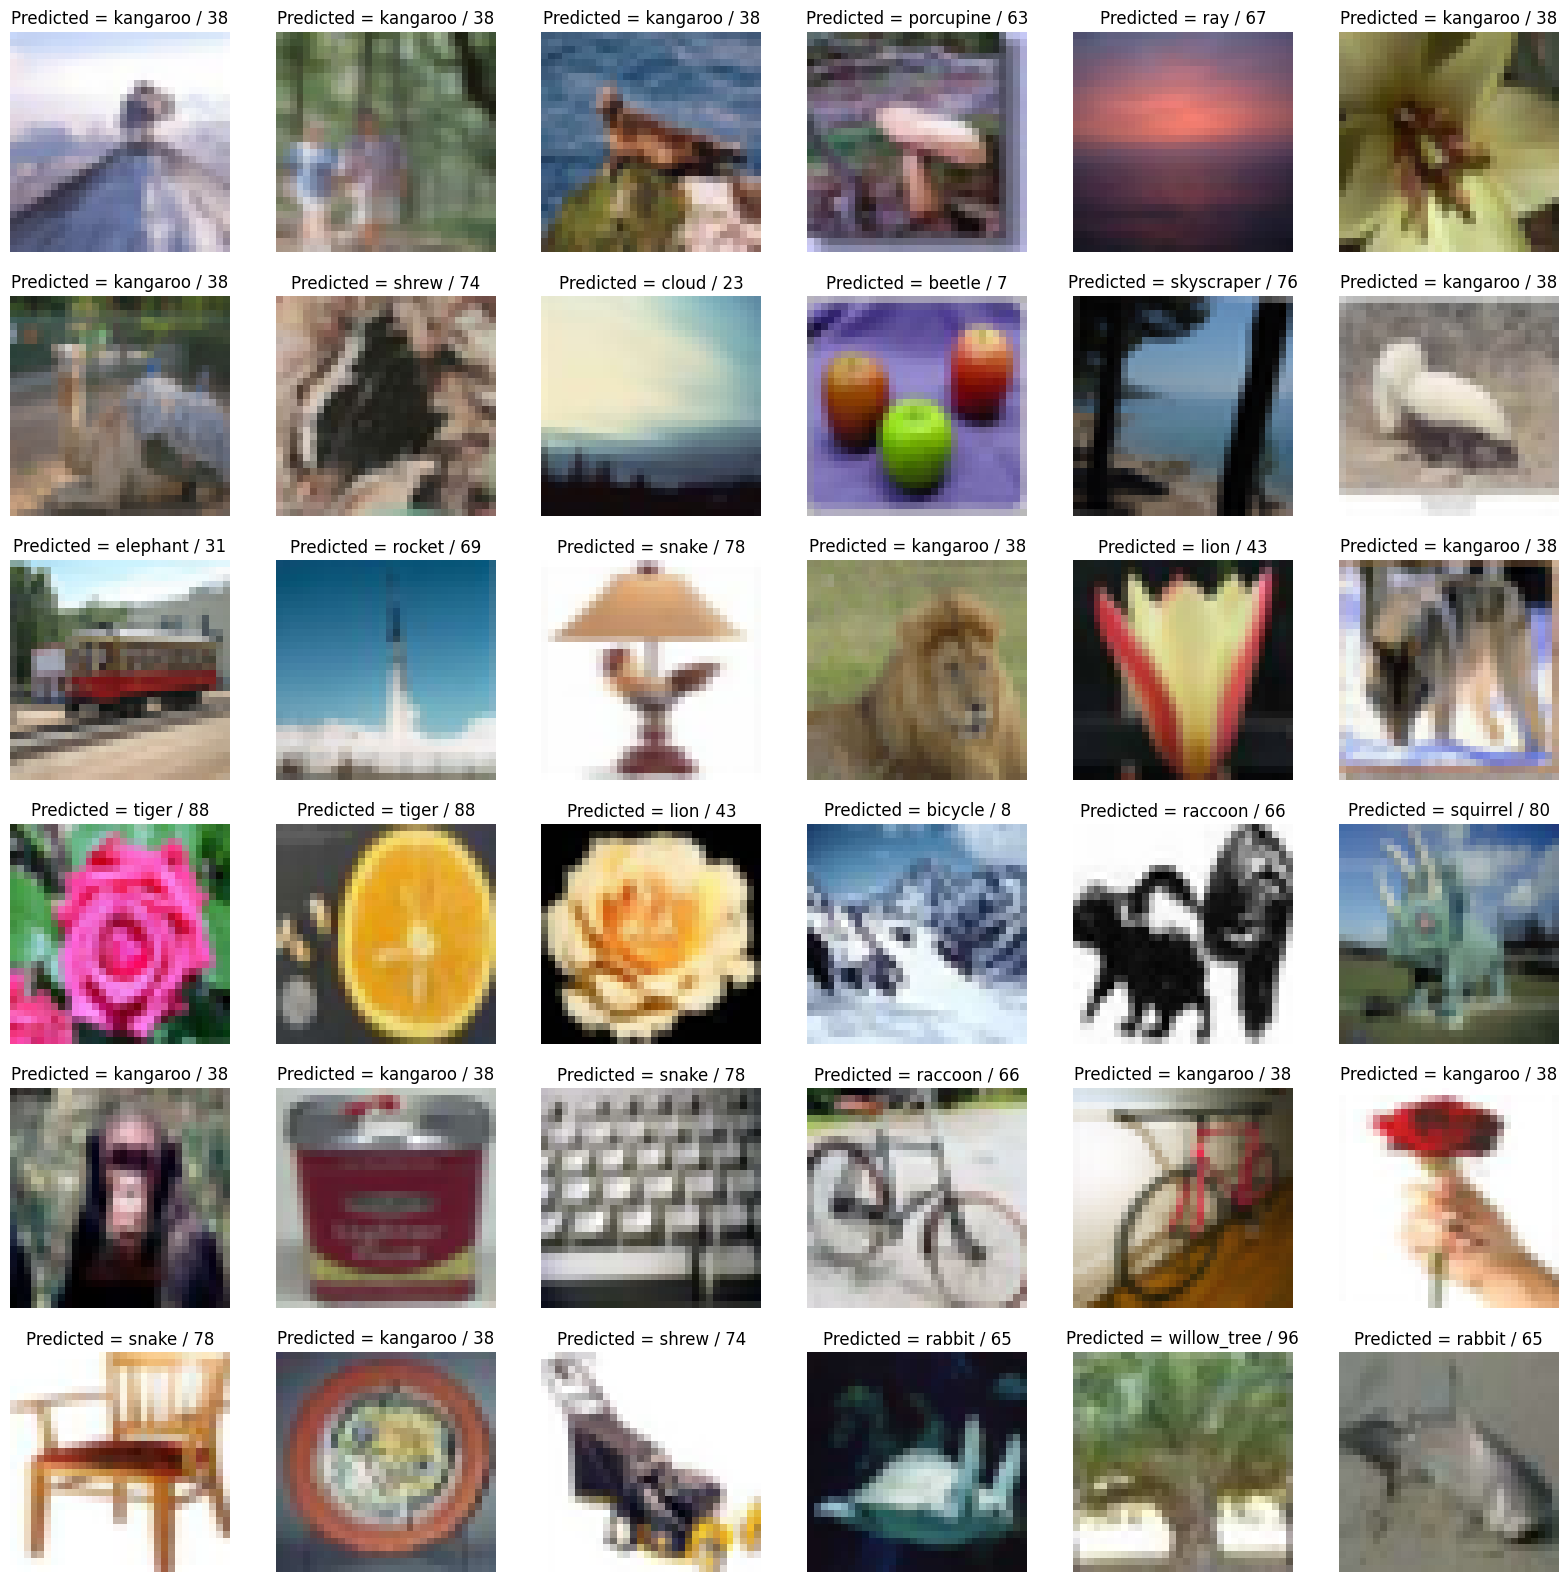

In [ ]:
y_pred = model.predict(test_images).round(2)

y_val_label = list(map(np.argmax, test_labels))
y_pred_label = list(map(np.argmax, y_pred))

aaa = np.array(y_val_label) != np.array(y_pred_label)

not_equel_list = np.where(aaa == True)[0]



print("\nAccuracy: %.4f" % accuracy)

plt.figure(figsize=(20,20))
j = 1
for i in not_equel_list[0:36]:
# for a in np.random.randint(0,206,36):
#     i = not_equel_list[a]
#     print(a)
    plt.subplot(6,6,j); j+=1
    plt.imshow(test_images[i].reshape(32,32,3),cmap = 'Greys')
    plt.axis('off')
    plt.title('Predicted = {} / {}'.format(class_names[y_pred_label[i]], y_pred_label[i]))

#### 보고서

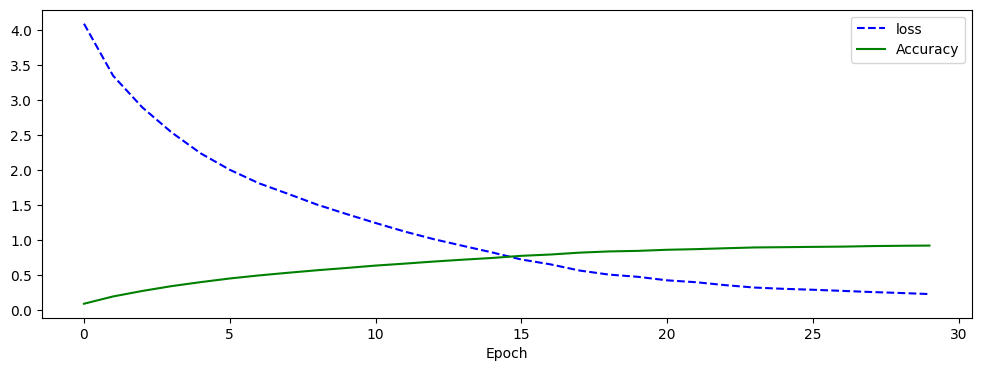

최적화 완료!


In [ ]:
plt.figure(figsize = (12,4))
plt.subplot(1, 1, 1)

plt.plot(history.history['loss'], 'b--', label = 'loss')
plt.plot(history.history['accuracy'], 'g-', label='Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
print('최적화 완료!')

---

### Bidrectional RNN

In [ ]:
from tensorflow.keras.layers import LSTM, Flatten, Dense, Bidirectional
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets.mnist import load_data

# cifar10 데이터셋을 로드하여 준비
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# # 픽셀값 0~1로 정규화
# train_images = train_images.reshape((,28,28))
# test_images = test_images.reshape((10000,28,28))
train_images, test_images = train_images / 255.0, test_images / 255.0

# 데이터 레이블 one hot 코드 변경
one_hot_train_labels = to_categorical(train_labels, 10)
one_hot_test_labels = to_categorical(test_labels, 10)


model = tf.keras.models.Sequential()
model.add(Bidirectional(LSTM(units=64, return_sequences = True),input_shape = (28, 28)))
model.add(Bidirectional(LSTM(units=64, return_sequences = True)))
model.add(Bidirectional(LSTM(units=64, return_sequences = True)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_3 (Bidirecti  (None, 28, 128)           47616     
 onal)                                                           
                                                                 
 bidirectional_4 (Bidirecti  (None, 28, 128)           98816     
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 28, 128)           98816     
 onal)                                                           
                                                                 
 flatten_1 (Flatten)         (None, 3584)              0         
                                                                 
 dense_6 (Dense)             (None, 10)                35850     
                                                      

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, one_hot_train_labels, epochs=5,batch_size=32)
print("\n=============test results==========")
labels=model.predict(test_images)
print("\n Accuracy: %.4f" % (model.evaluate(test_images,
one_hot_test_labels)[1]
))
print("===================================")

Epoch 1/5
1875/1875 [==============================] - 42s 16ms/step - loss: 0.2028 - accuracy: 0.9345
Epoch 2/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0675 - accuracy: 0.9792
Epoch 3/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0472 - accuracy: 0.9856
Epoch 4/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0362 - accuracy: 0.9886
Epoch 5/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0297 - accuracy: 0.9904

=============test results==========
313/313 [==============================] - 7s 10ms/step - loss: 0.0421 - accuracy: 0.9878

 Accuracy: 0.9878
